## Visualization & Analysis



Hello. I'm Kaggler, who was on the upvote rankings last year with interactive visualization.

This time, I'll show you the beauty of ordinary visualization.

### Please be sure to leave a reference when using code or taking ideas in my visualizations.

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [8]:
data = pd.read_csv('./data/kaggle_survey_2020_responses.csv')
questions = data.iloc[0, :].T
data = data.iloc[1:, :]


## Q1 & Q2. Age/Gender Distribution

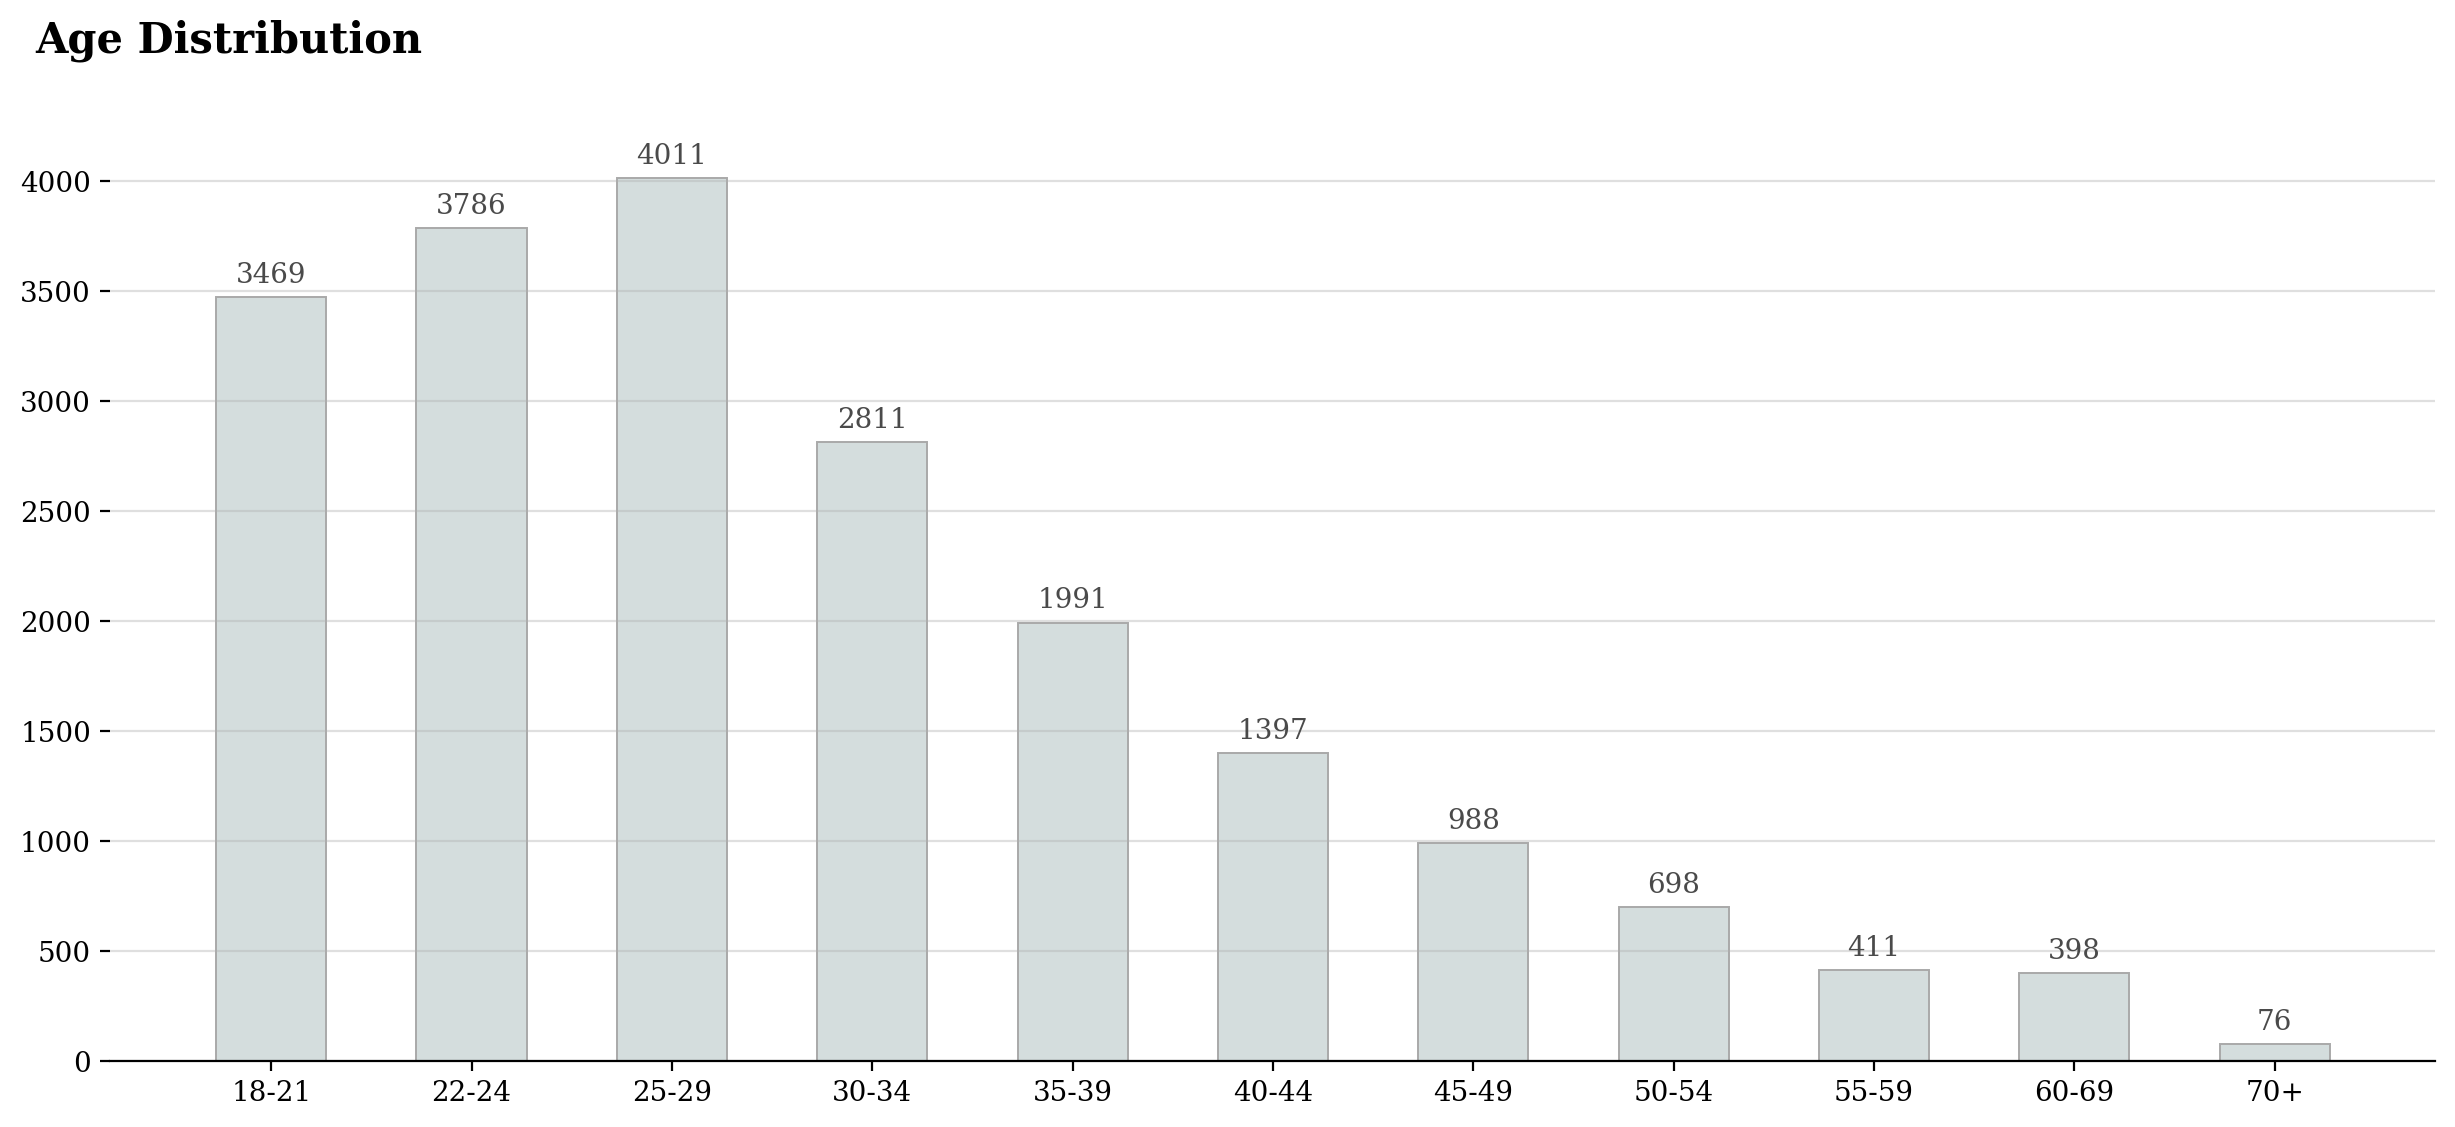

In [9]:
# Q1 & Q2 Analysis
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data_q1 = data['Q1'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, 
       edgecolor='darkgray', color='#d4dddd',
       linewidth=0.7)

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", 
                   xy=(i, data_q1[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 4200)    
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 4001, 500),fontfamily='serif')
fig.text(0.1, 0.95, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

You can see that more than half of the total is under 30.

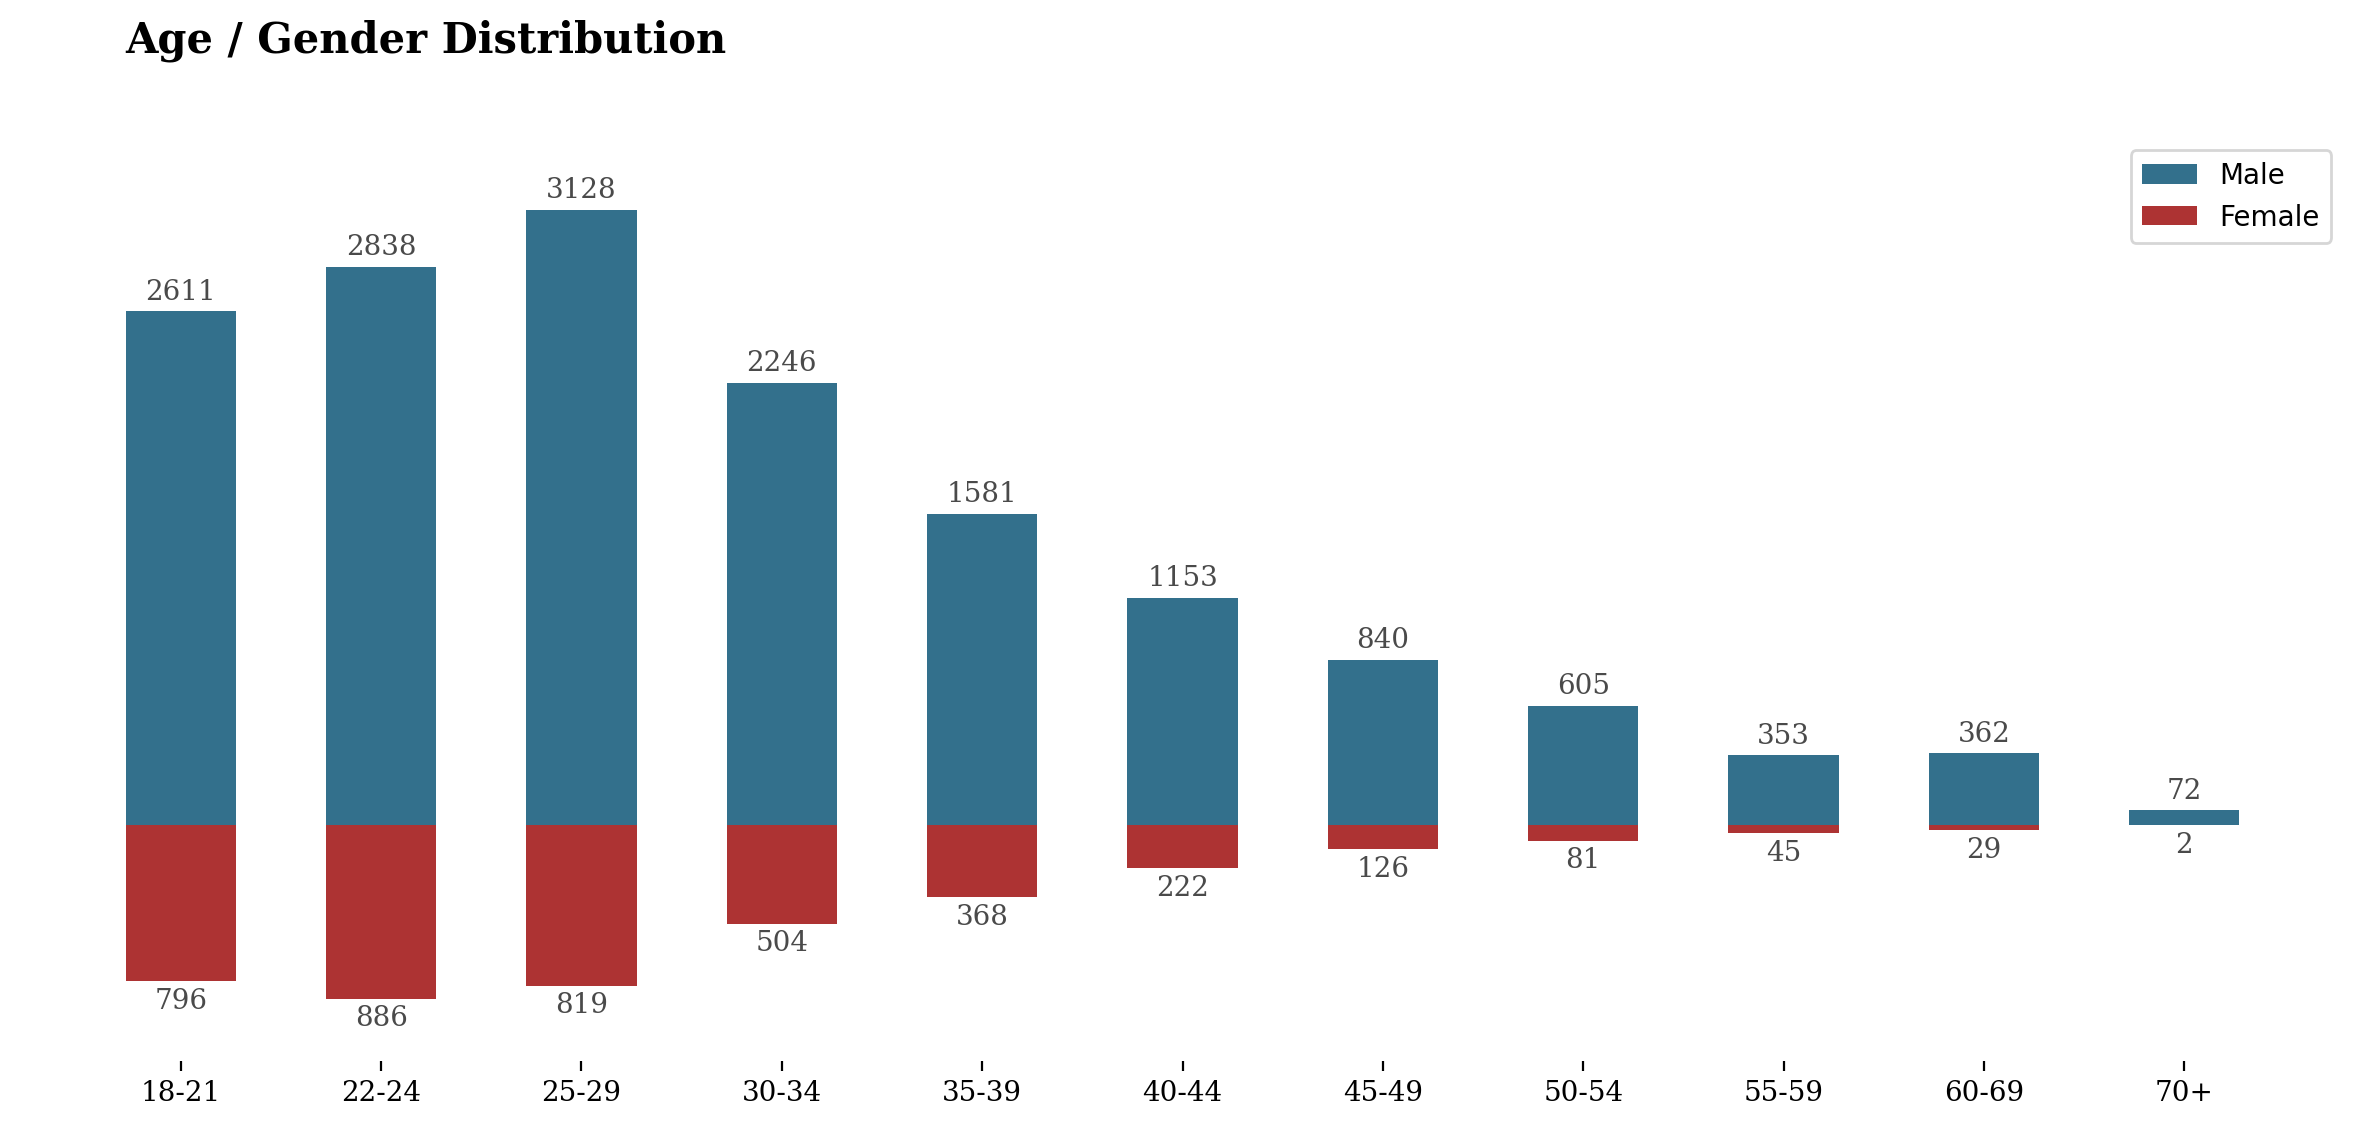

In [10]:
# Q2 Analysis
data['Q2'] = data['Q2'].apply(lambda x : 'ETC' if x not in ['Man', 'Woman'] else x)
data_q1q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-1200, 3500)

for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()

Obviously, I felt that there was a lot of influx of women, but I can see that there are still few.

## Q2 & Q3. Gender & Country

In [11]:
q3_order = data['Q3'].value_counts()[:11].drop('Other').index
data_q2q3 = data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man', 'Woman', 'ETC']].rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})[::-1]

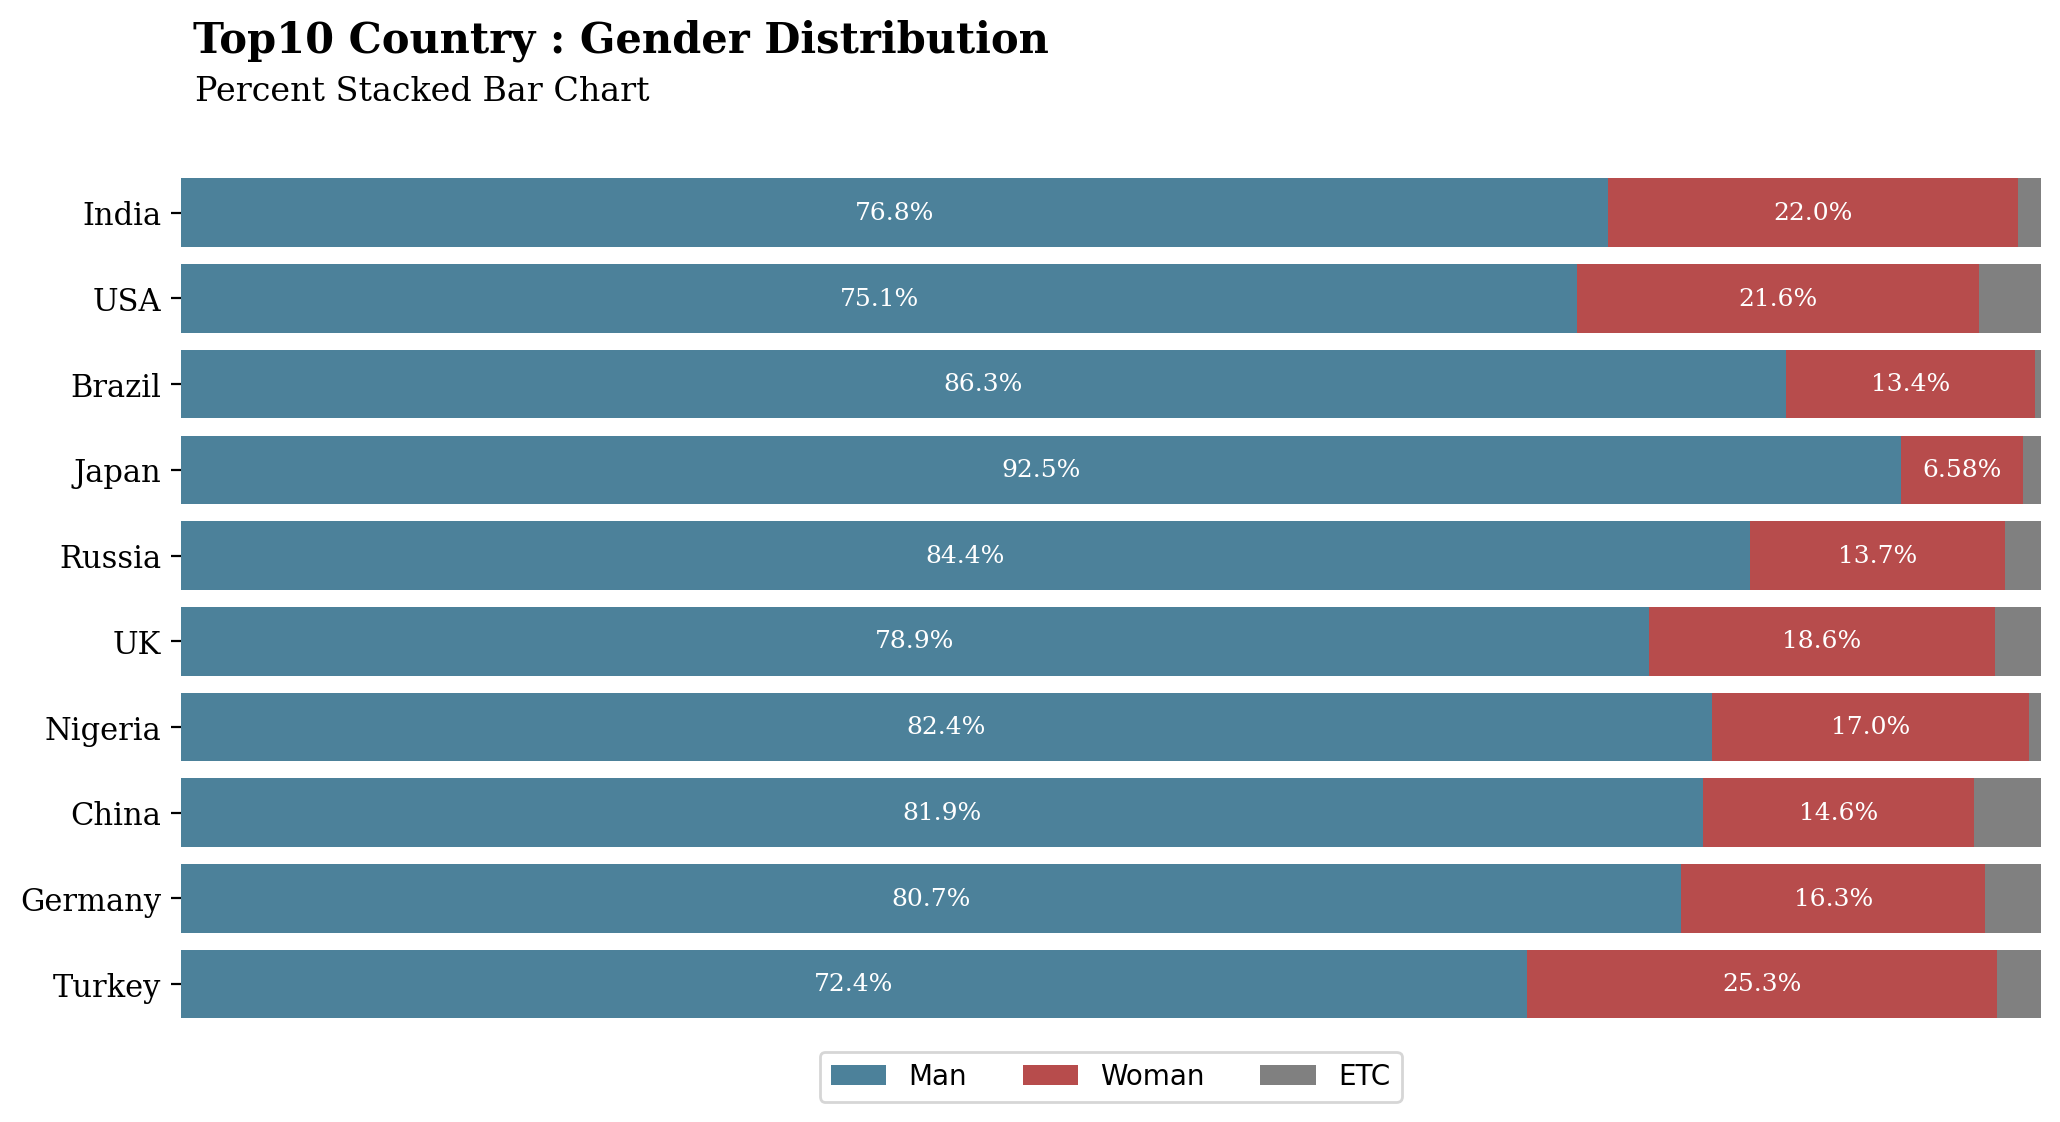

In [12]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], 
        color='#004c70', alpha=0.7, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'], left=data_q2q3_ratio['Man'], 
        color='#990000', alpha=0.7, label='Woman')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['ETC'], left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'], 
        color='#4a4a4a', alpha=0.7, label='ETC')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.95, 'Top10 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.show()

Gender ratio for the top 10 countries in the number of responses.

You can see that the number of women is still very short. 

In particular, in Japan, only 6.5% are women.

 ## Q4 & Q6. Degree / Experience
 

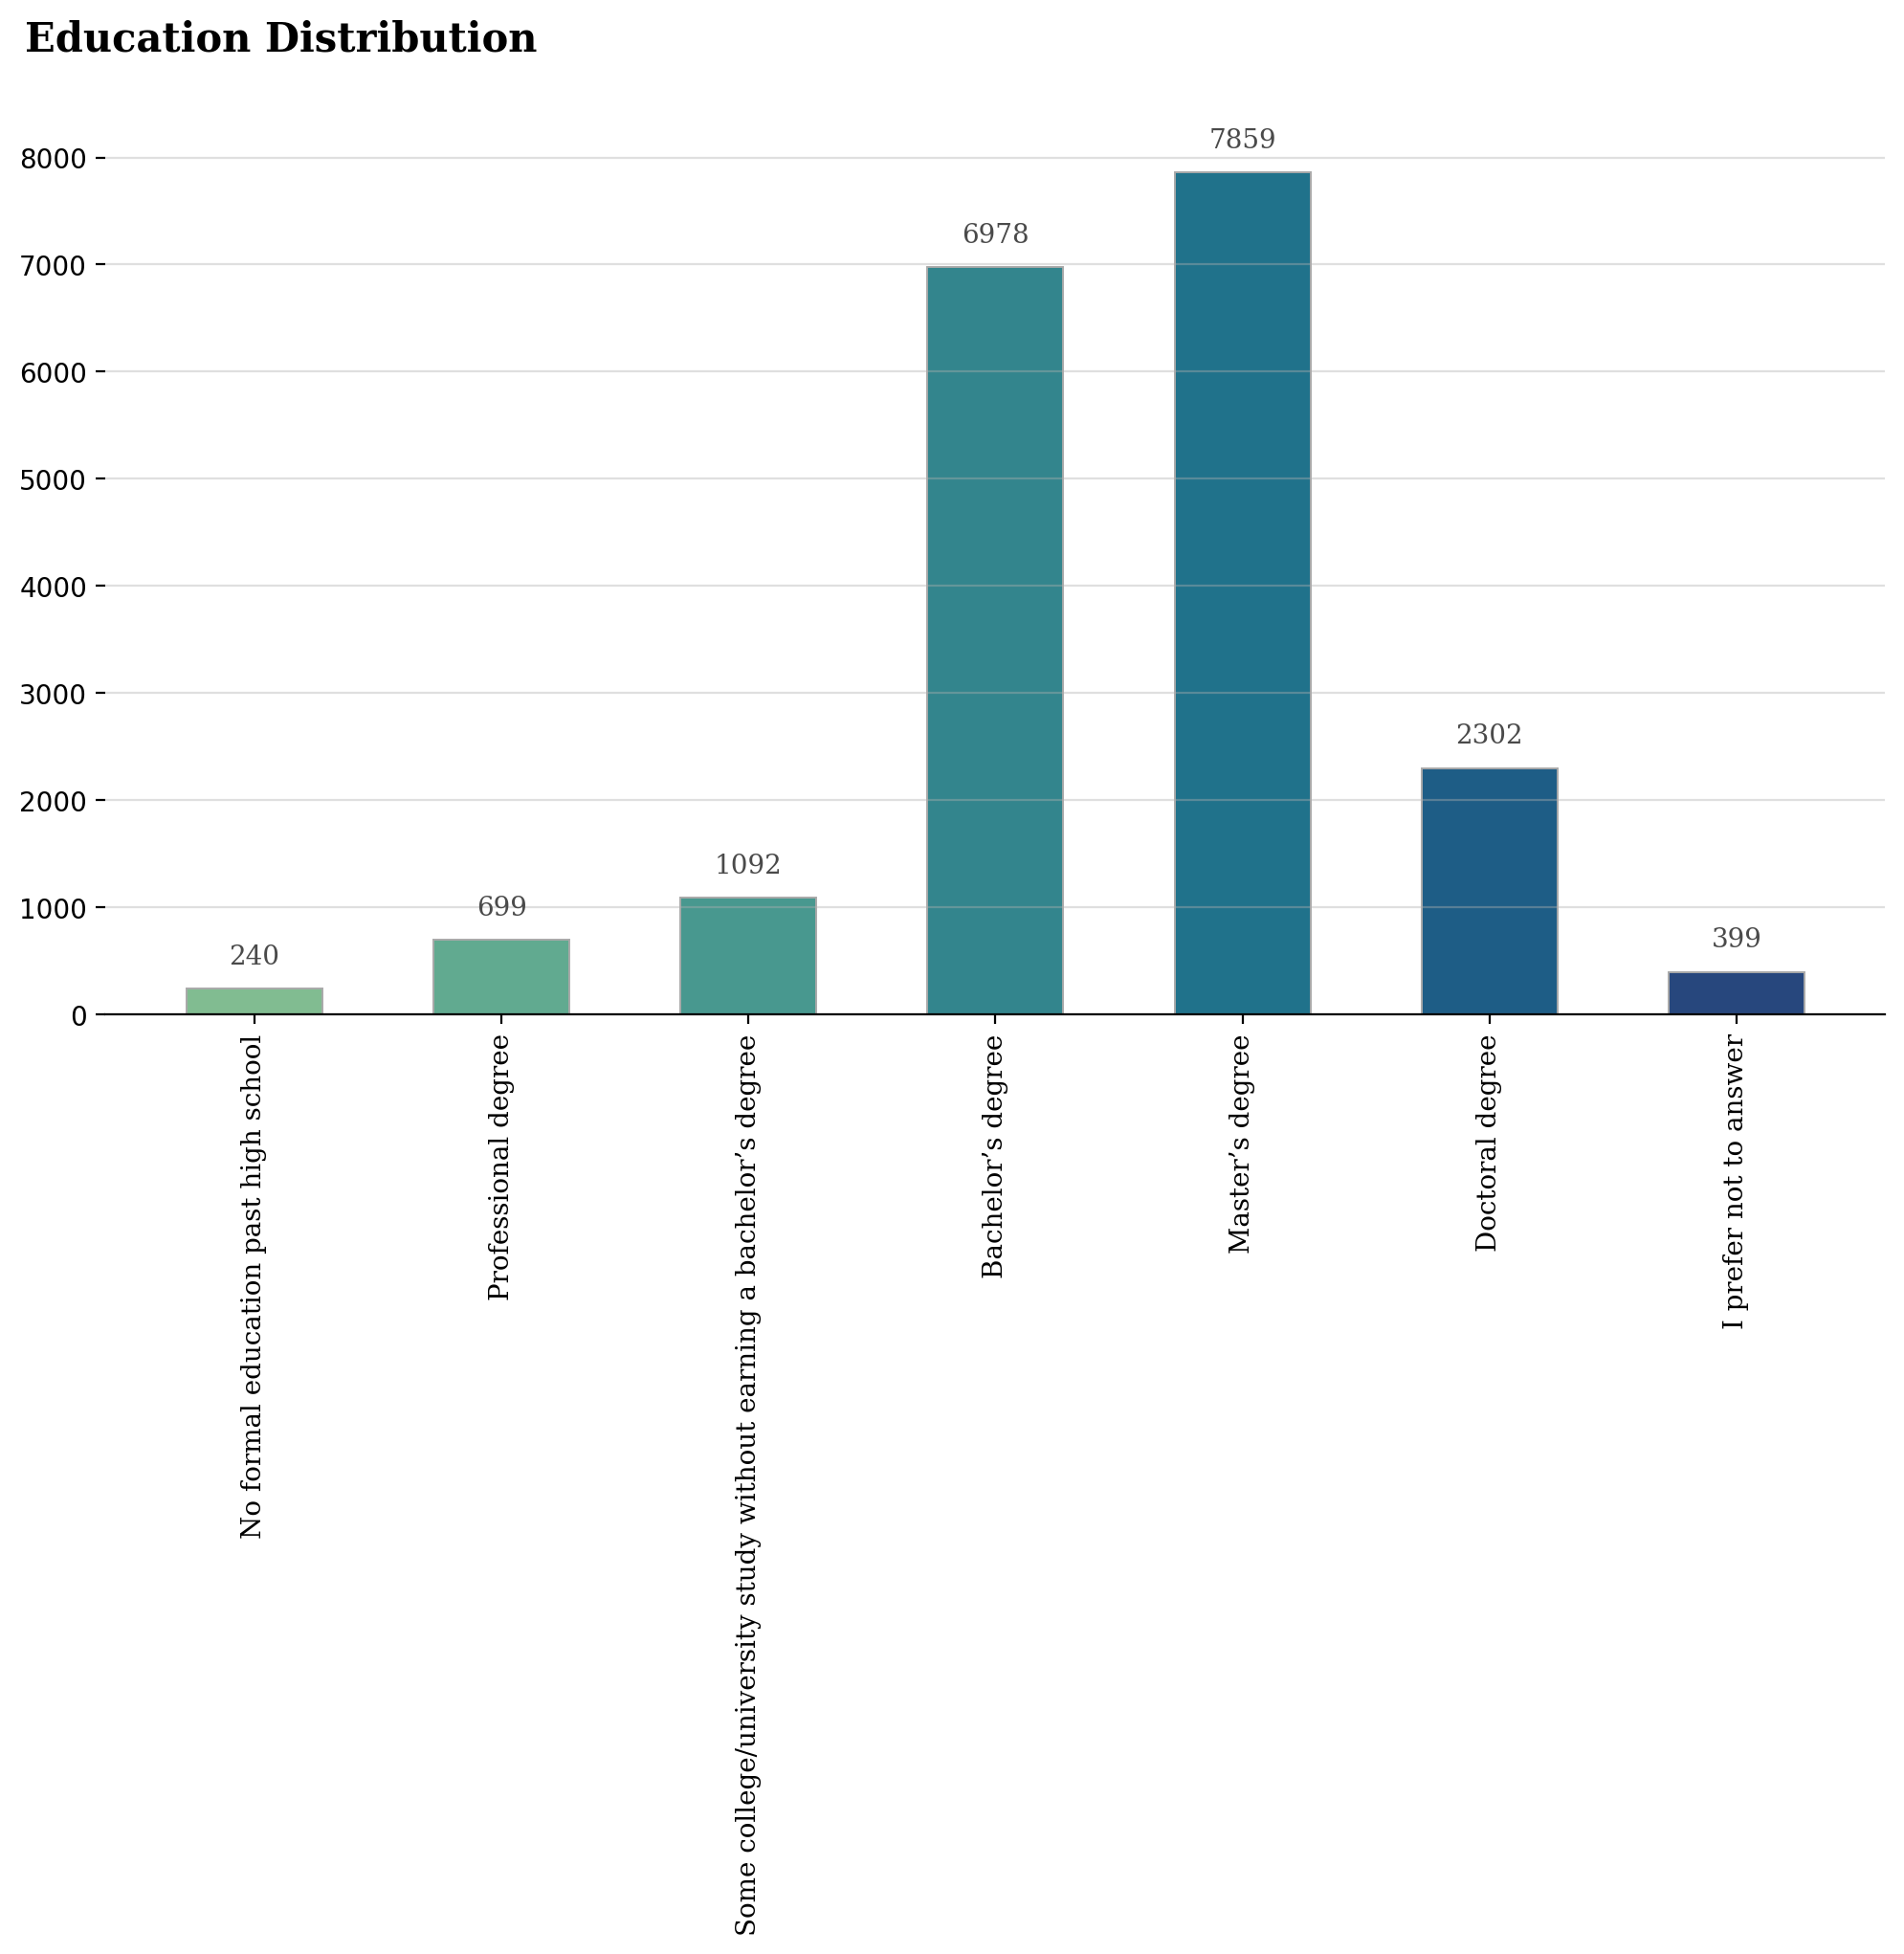

In [13]:
q4_order = [
    'No formal education past high school',
    'Professional degree',
    'Some college/university study without earning a bachelor’s degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctoral degree',
    'I prefer not to answer'
]

data_q4 = data['Q4'].value_counts()[q4_order]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q4.index, data_q4, width=0.55, 
       edgecolor='darkgray', color=sns.color_palette("crest", 7),
       linewidth=0.7)

for i in data_q4.index:
    ax.annotate(f"{data_q4[i]}", 
                   xy=(i, data_q4[i] + 300),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q4.index, fontfamily='serif', rotation=90)
fig.text(0.09, 0.95, 'Education Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

I thought there would be the most bachelors, but there are the most masters.

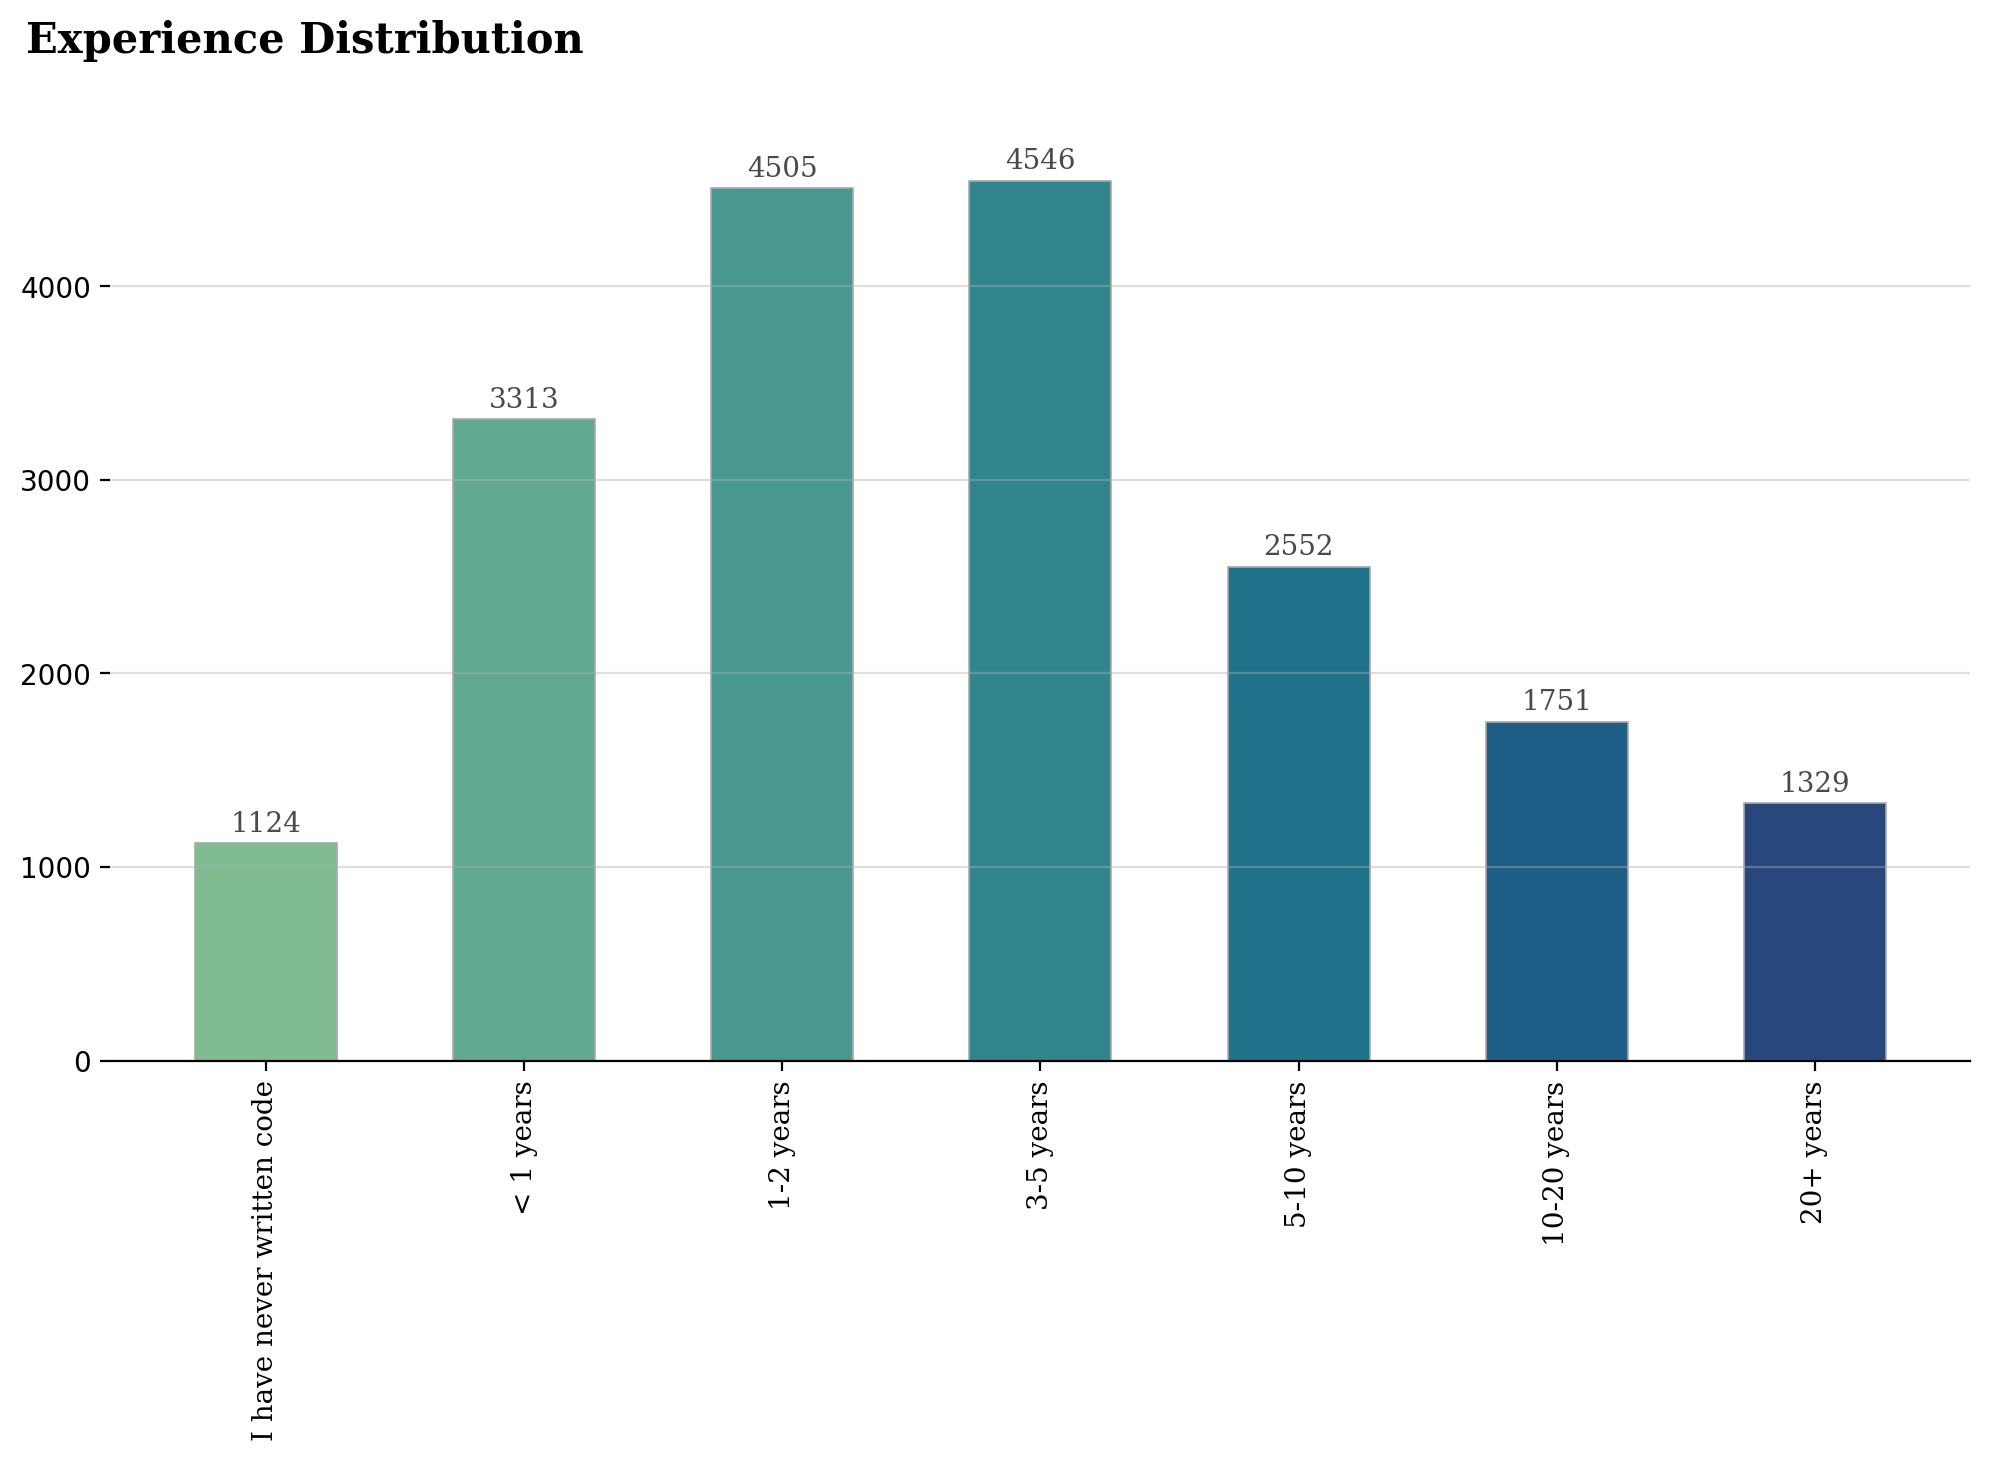

In [14]:
q6_order = [
      'I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years',
]

data_q6 = data['Q6'].value_counts()[q6_order]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q6.index, data_q6, width=0.55, 
       edgecolor='darkgray', color=sns.color_palette("crest", 7),
       linewidth=0.6)

for i in data_q6.index:
    ax.annotate(f"{data_q6[i]}", 
                   xy=(i, data_q6[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q6.index, fontfamily='serif', rotation=90)

fig.text(0.09, 0.95, 'Experience Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

About 75% have less than 5 years of experience and 25% have more than 5 years.

This time, let's look at the two questions at once.

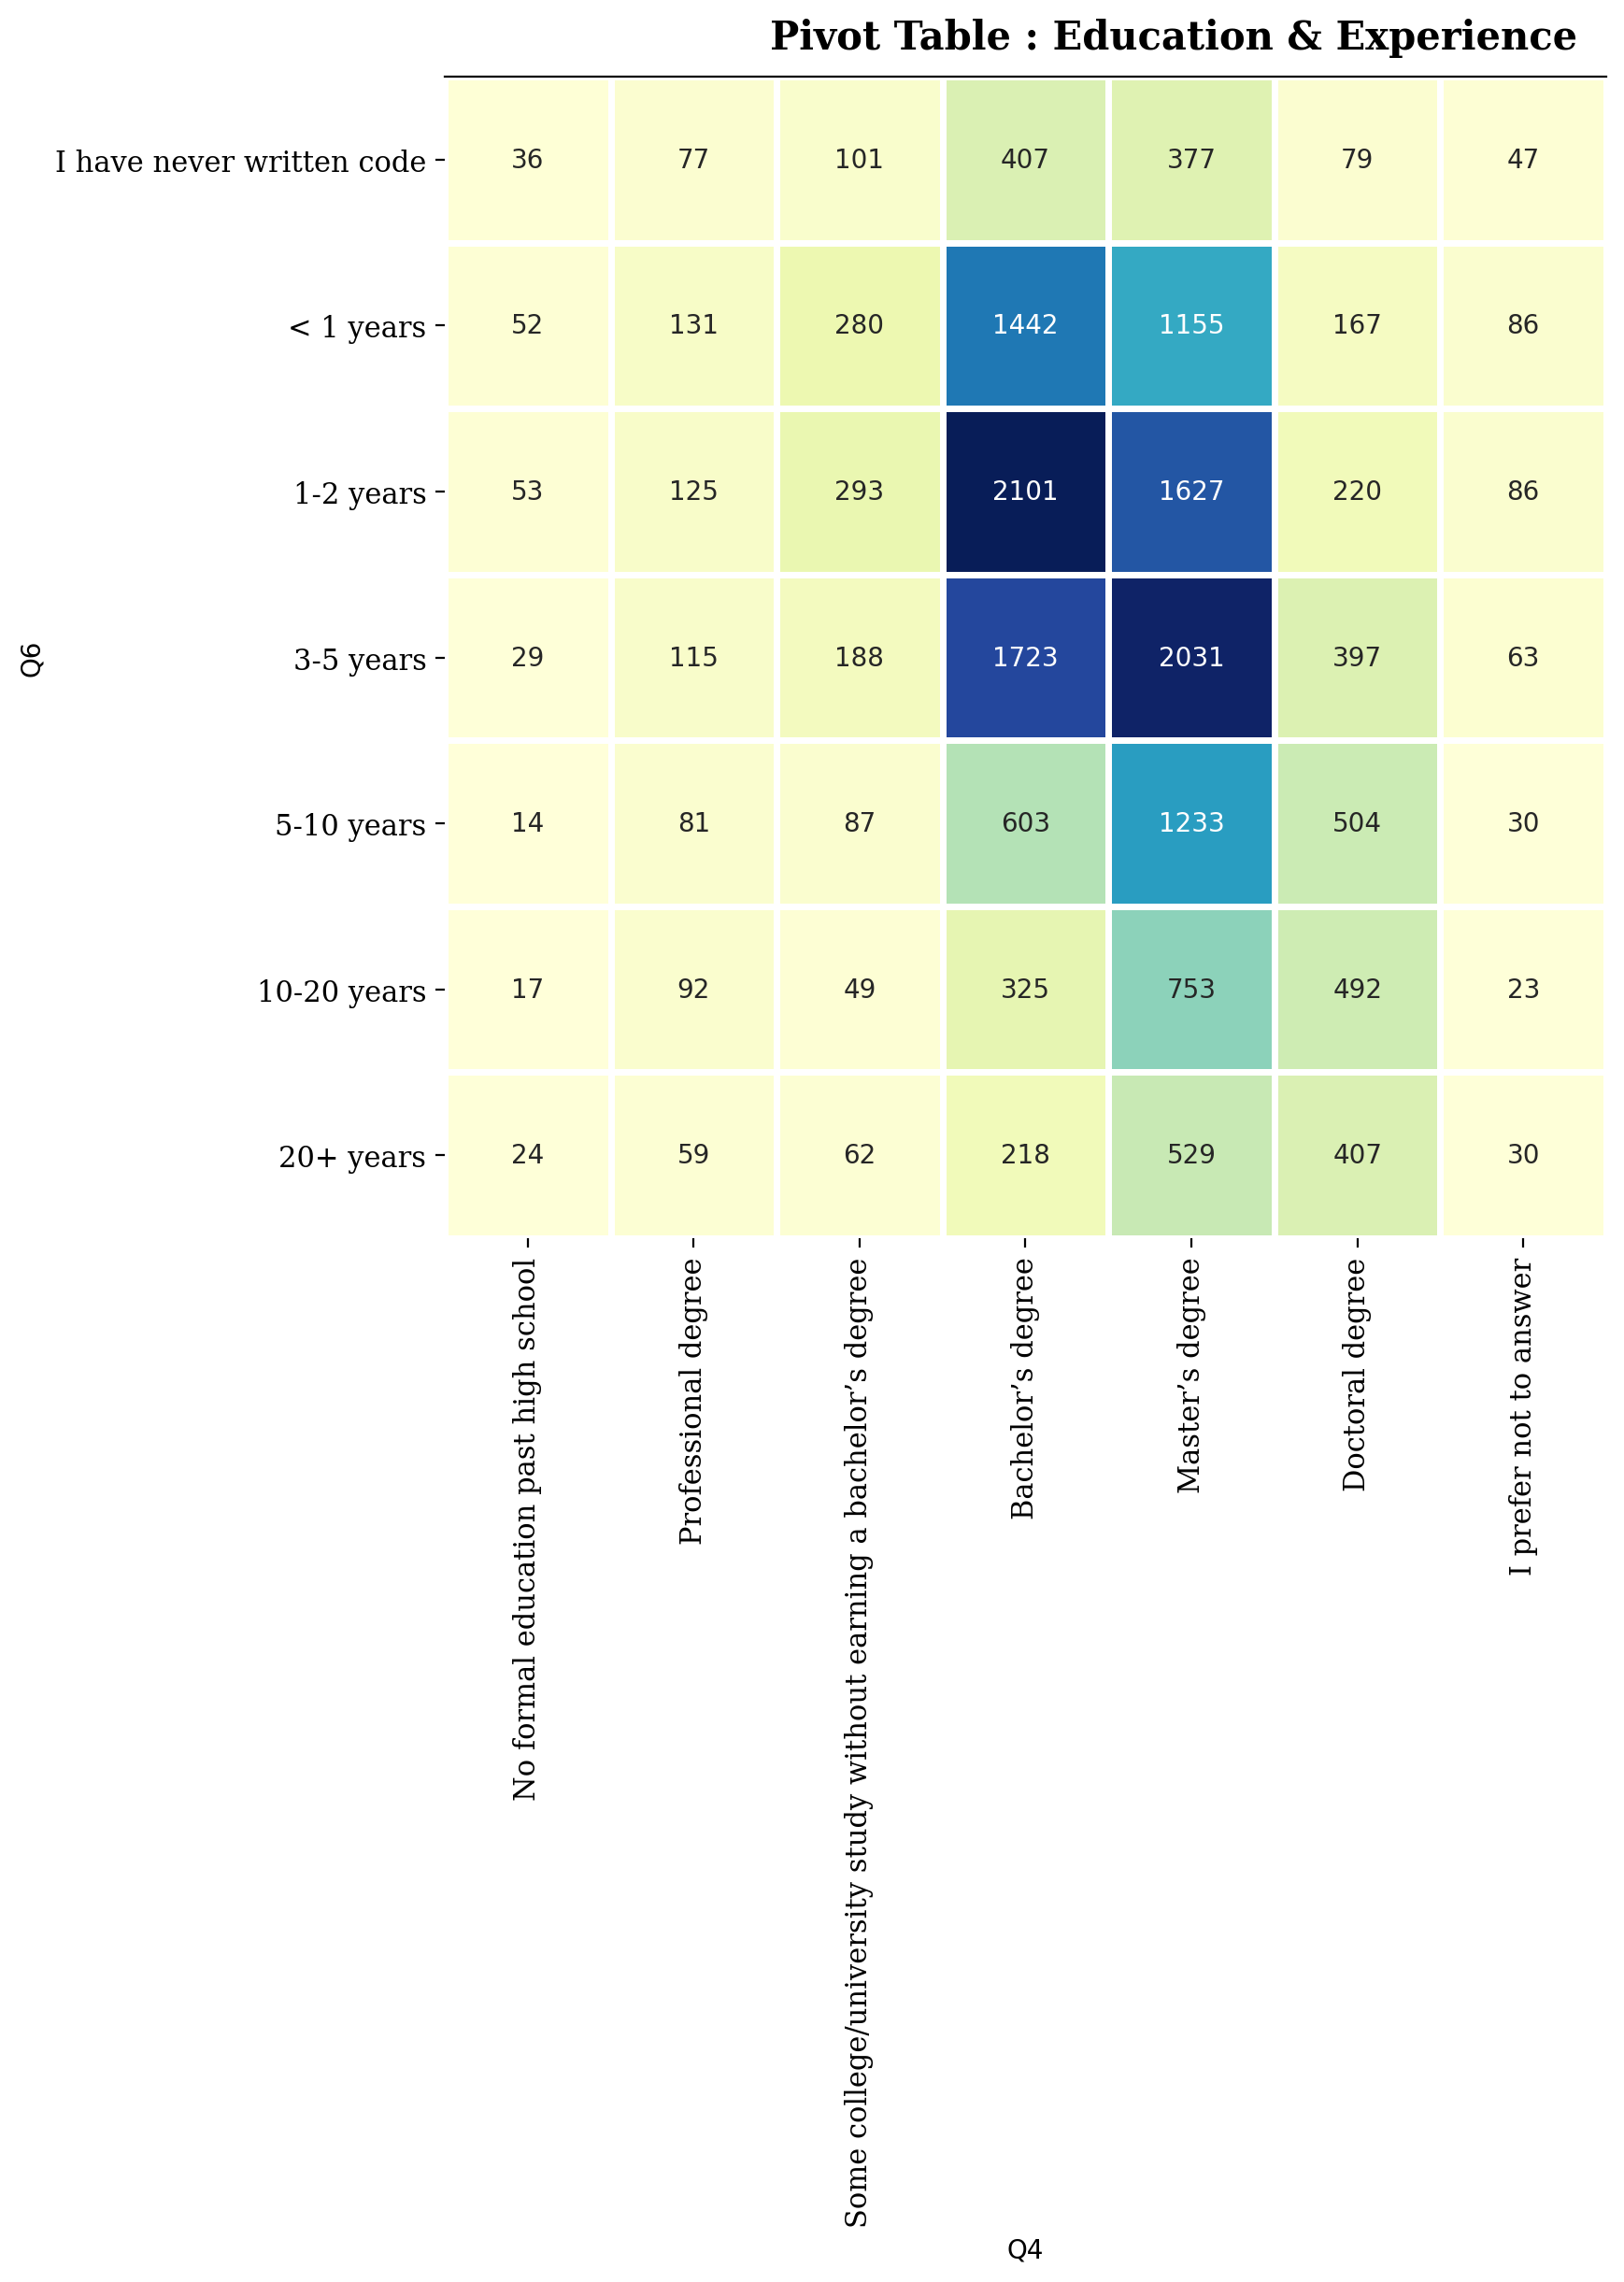

In [15]:
data['count'] = 1
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(pd.pivot_table(data, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum).loc[q6_order, q4_order], 
            cmap="YlGnBu",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True,
            fmt="d"
           )

ax.spines['top'].set_visible(True)

fig.text(0.48, 1, 'Pivot Table : Education & Experience', fontweight='bold', fontfamily='serif', fontsize=15)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

The most common is a 1-2 year bachelor's degree and a 3-5 year graduate.

## Q14. Visualization Library 

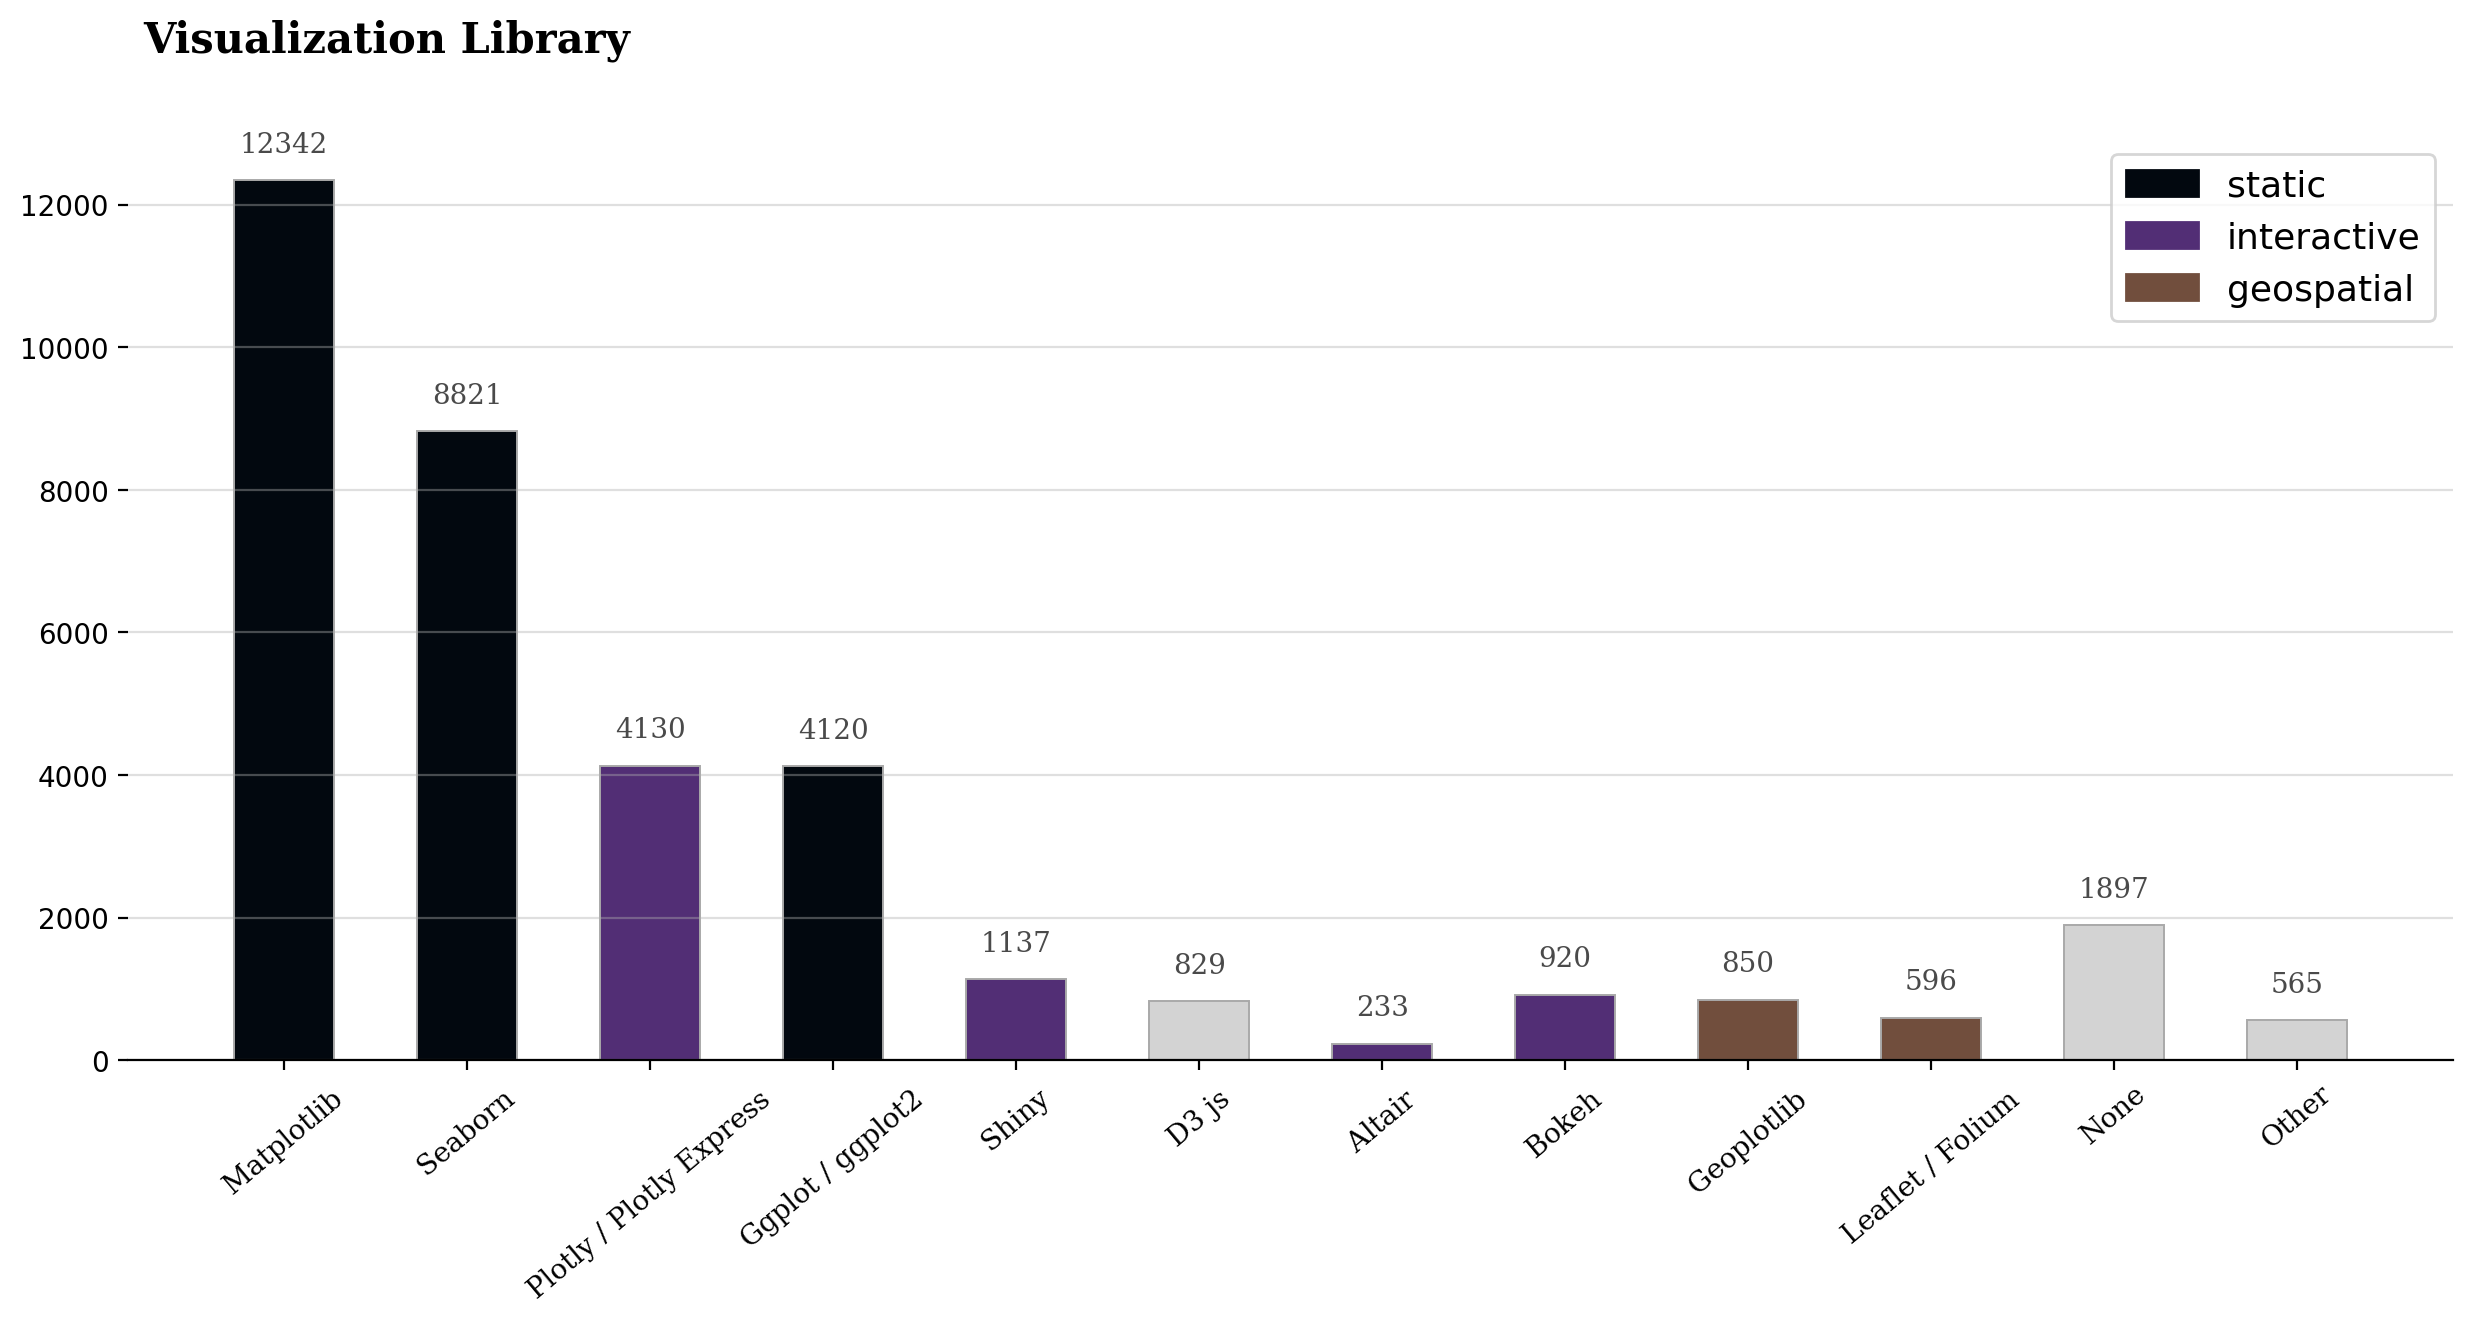

In [16]:
data_q14 = data[[i for i in data.columns if 'Q14' in i]]
data_q14_count = pd.Series(dtype='int')
for i in data_q14.columns:
    data_q14_count[data_q14[i].value_counts().index[0]] = data_q14[i].count()
    
# Q14

colors = ['lightgray'] * 14 
colors[0] = colors[1] = colors[3] = '#02080F'
colors[2] = colors[4] = colors[6] = colors[7] = '#522e75'
colors[8] = colors[9] = '#714e3d'

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(data_q14_count.index, data_q14_count, width=0.55, 
       edgecolor='darkgray', color=colors,
       linewidth=0.7)

for i in data_q14_count.index:
    ax.annotate(f"{data_q14_count[i]}", 
                   xy=(i, data_q14_count[i] + 500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q14_count.index, fontfamily='serif', rotation=40)
fig.text(0.13, 0.95, 'Visualization Library', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    

static = mpatches.Patch(color='#02080F', label='static')
interactive = mpatches.Patch(color='#522e75', label='interactive')
geo = mpatches.Patch(color='#714e3d', label='geospatial')

plt.legend(handles=[static, interactive, geo], fontsize=13)

plt.show()

1. The most basic library, matplotlib, is used the most.
2. Plotly is the most used for interactive visualization.
3. It is unfortunate that the number of geovisualization libraries is insufficient. 
    - Folium is still less used than Geoplotlib.
4. There are more d3 users than I think. Is there any reason to use d3 even though it is ML unfriendly?

## Q2 & Q5 & Q15. Gender / Position / ML Experience

In [17]:
q5_order = ['Business Analyst'
 ,'Data Analyst'
 ,'Data Engineer'
 ,'Data Scientist'
 ,'DBA/Database Engineer'
 ,'Machine Learning Engineer'
 ,'Product/Project Manager'
 ,'Research Scientist'
 ,'Software Engineer'
 ,'Statistician'
 ,'Student'
 ,'Currently not employed'
 ,'Other']

q15_order = [
    'I do not use machine learning methods'
    ,'Under 1 year'
    ,'1-2 years'
    ,'2-3 years'
    ,'3-4 years'
    ,'4-5 years'
    ,'5-10 years'
    ,'10-20 years'
    ,'20 or more years']



data_q5q15 = pd.pivot_table(data, values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()
data_q5q15_man = pd.pivot_table(data[data['Q2']=='Man'], values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()
data_q5q15_woman = pd.pivot_table(data[data['Q2']=='Woman'], values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()

In [13]:
# https://stackoverflow.com/questions/56337732/how-to-plot-scatter-pie-chart-using-matplotlib
def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha=0.7)

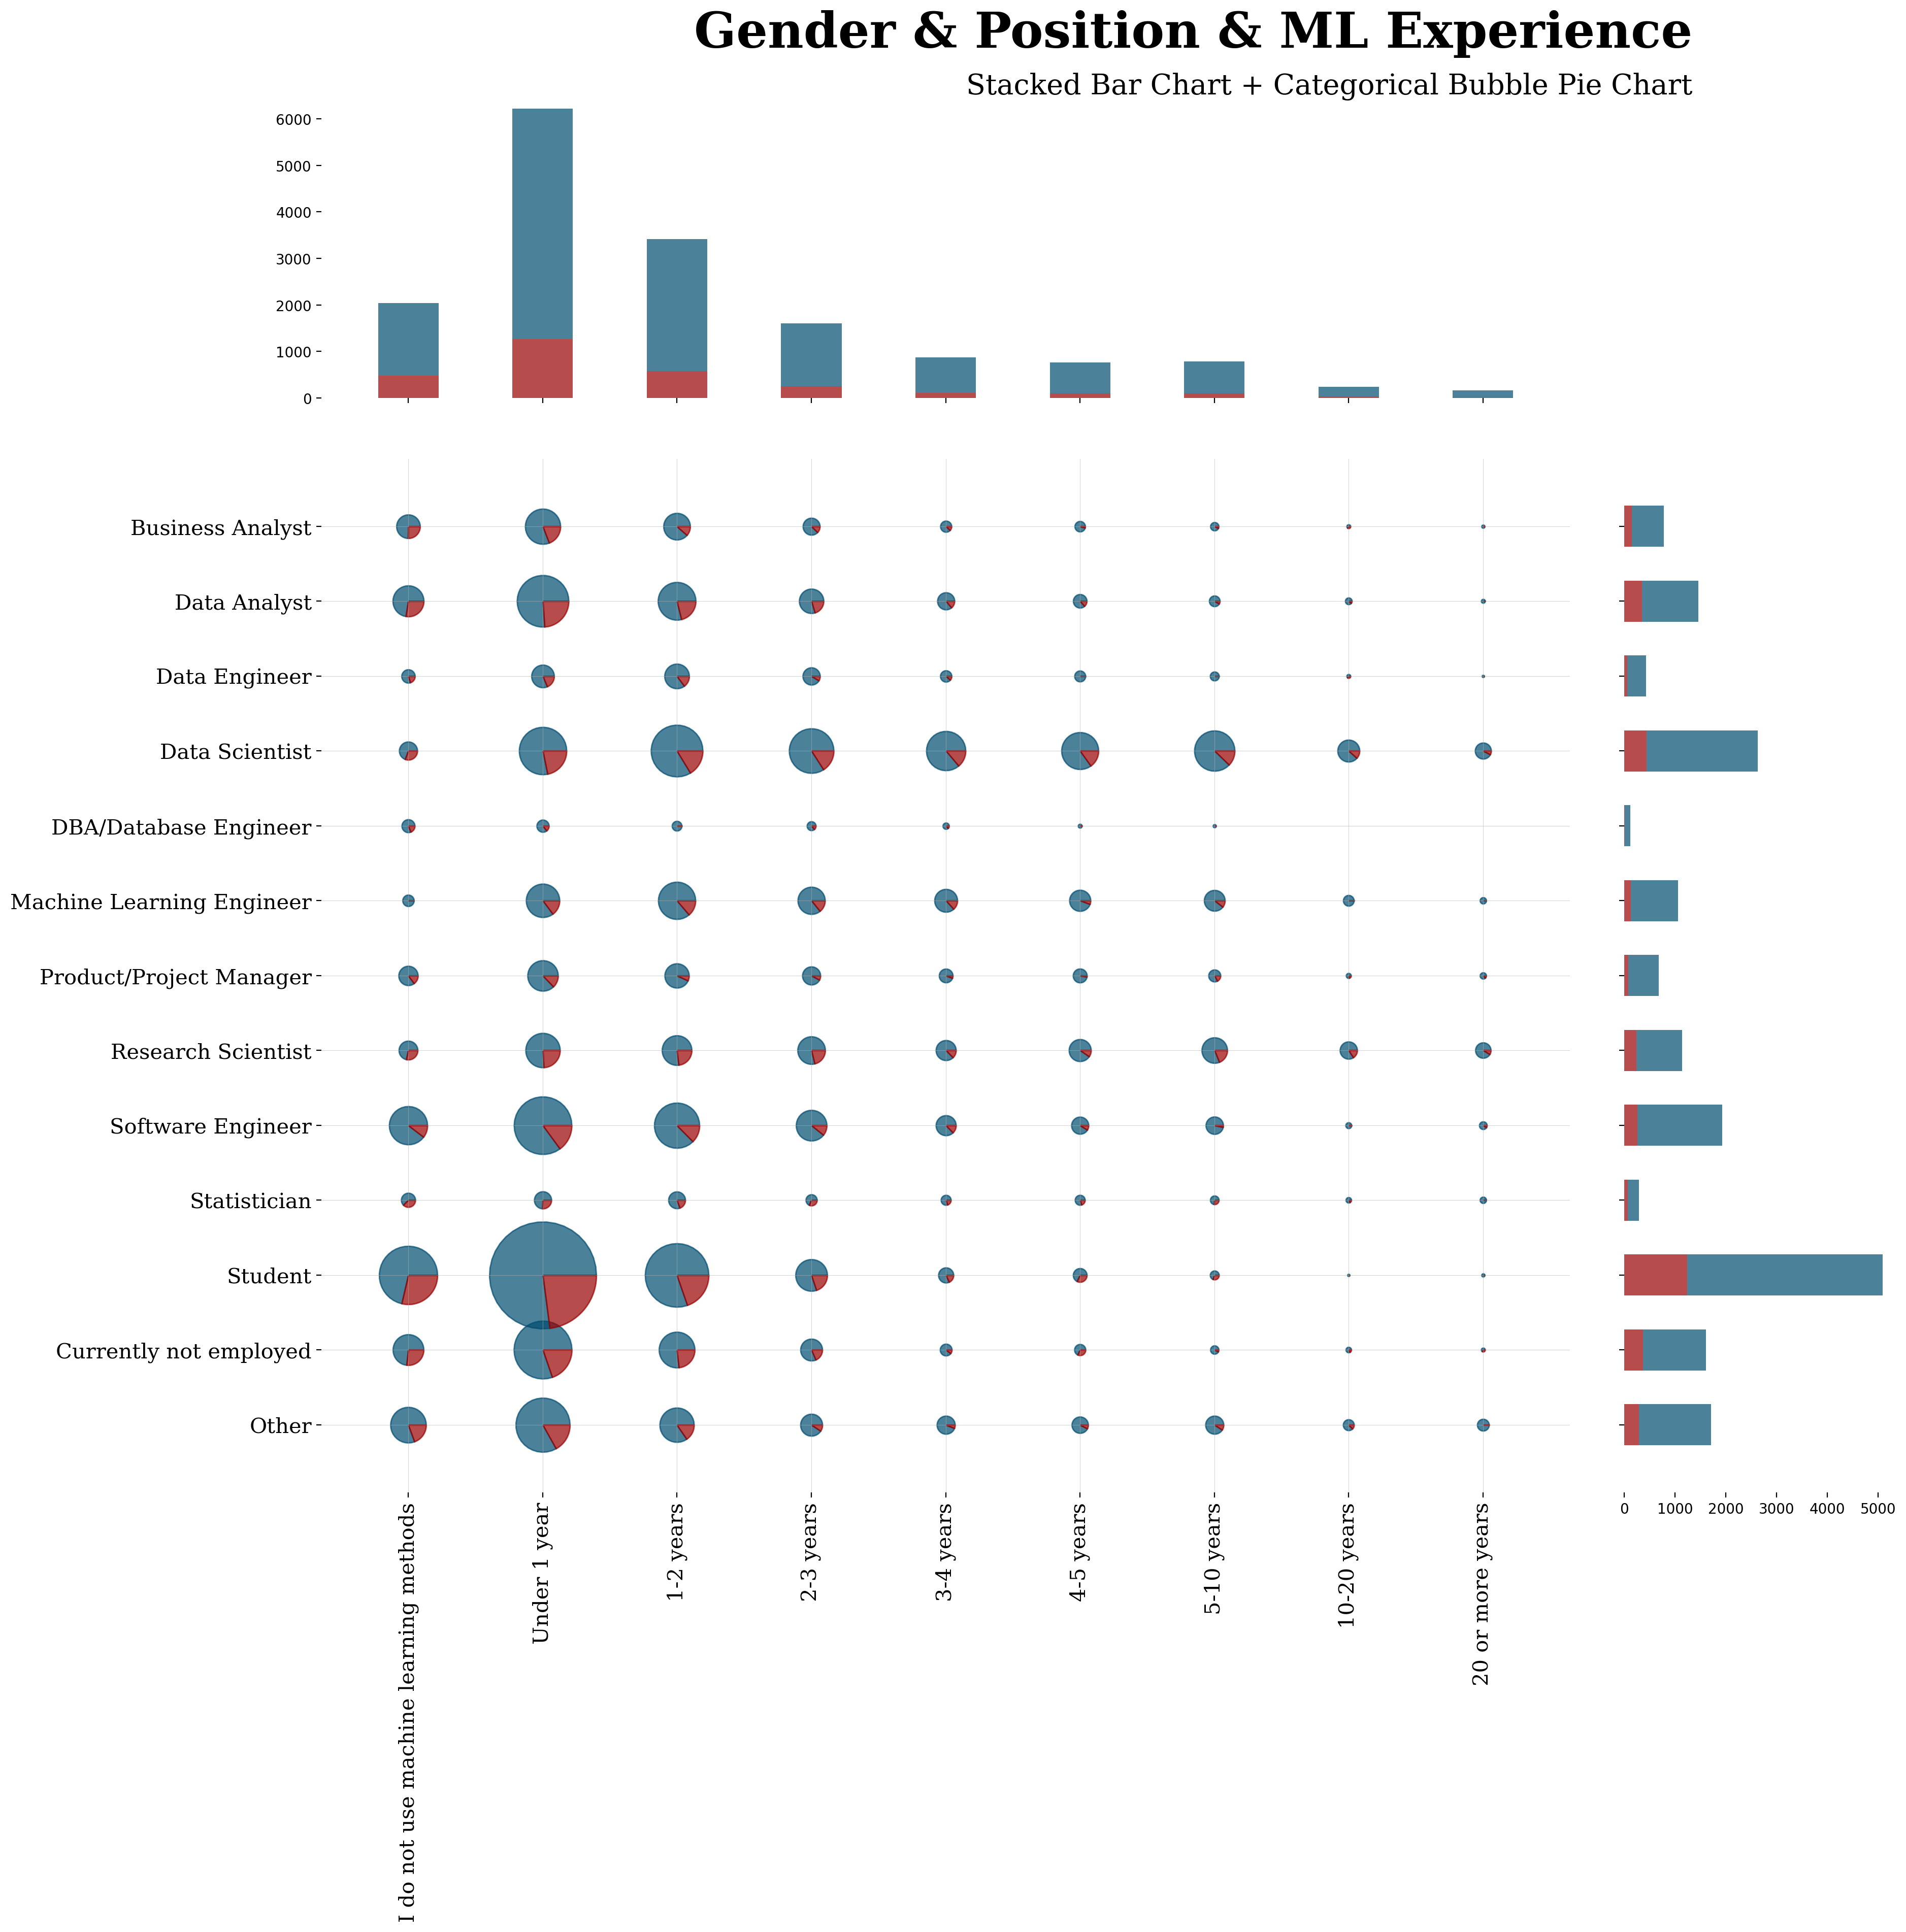

In [14]:

fig = plt.figure(figsize=(20, 23), dpi=200)

gs = fig.add_gridspec(5, 5)



ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for q5_idx in q5_order[::-1]:
    for q15_idx in q15_order:
        man = data_q5q15_man[q5_idx][q15_idx]
        woman = data_q5q15_woman[q5_idx][q15_idx]
        tot = data_q5q15[q5_idx][q15_idx]
        drawPieMarker([q15_idx],[q5_idx], [man/(man+woman), woman/(man+woman)] ,[tot*2.5], ['#004c70', '#990000'], ax=ax_plot)

ax_plot.grid(linewidth=0.2, zorder=0)        

ax_plot.set_yticklabels(q5_idx, fontfamily='serif', fontsize=15)
ax_plot.set_xticklabels(q15_idx, fontfamily='serif', fontsize=15, rotation=90)

# Pos
ax_pos = fig.add_subplot(gs[0, :4], sharex=ax_plot) 
data_q15_woman = data[data['Q2']=='Woman']['Q15'].value_counts()[q15_order]
ax_pos.bar(data_q15_woman.index, data_q15_woman, width=0.45, alpha=0.7, color='#990000')

data_q15_man = data[data['Q2']=='Man']['Q15'].value_counts()[q15_order]
ax_pos.bar(data_q15_man.index, data_q15_man, bottom=data_q15_woman , width=0.45, alpha=0.7, color='#004c70')

plt.setp(ax_pos.get_xticklabels(), visible=False)


# Exp
ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot) 

data_q5_woman = data[data['Q2']=='Woman']['Q5'].value_counts()[q5_order]
ax_exp.barh(data_q5_woman.index[::-1], data_q5_woman[::-1], height=0.55, alpha=0.7, color='#990000')

data_q5_man = data[data['Q2']=='Man']['Q5'].value_counts()[q5_order]
ax_exp.barh(data_q5_man.index[::-1], data_q5_man[::-1], left= data_q5_woman[::-1],height=0.55, alpha=0.7, color='#004c70')

plt.setp(ax_exp.get_yticklabels(), visible=False)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)
    

fig.text(0.8, 0.9, 'Gender & Position & ML Experience', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=20, ha='right')
# plt.tight_layout()
plt.show()

Those with short careers had a particularly high percentage of women.

Although it is still insufficient, it can be seen that the number of female ML developers is increasing compared to the past.



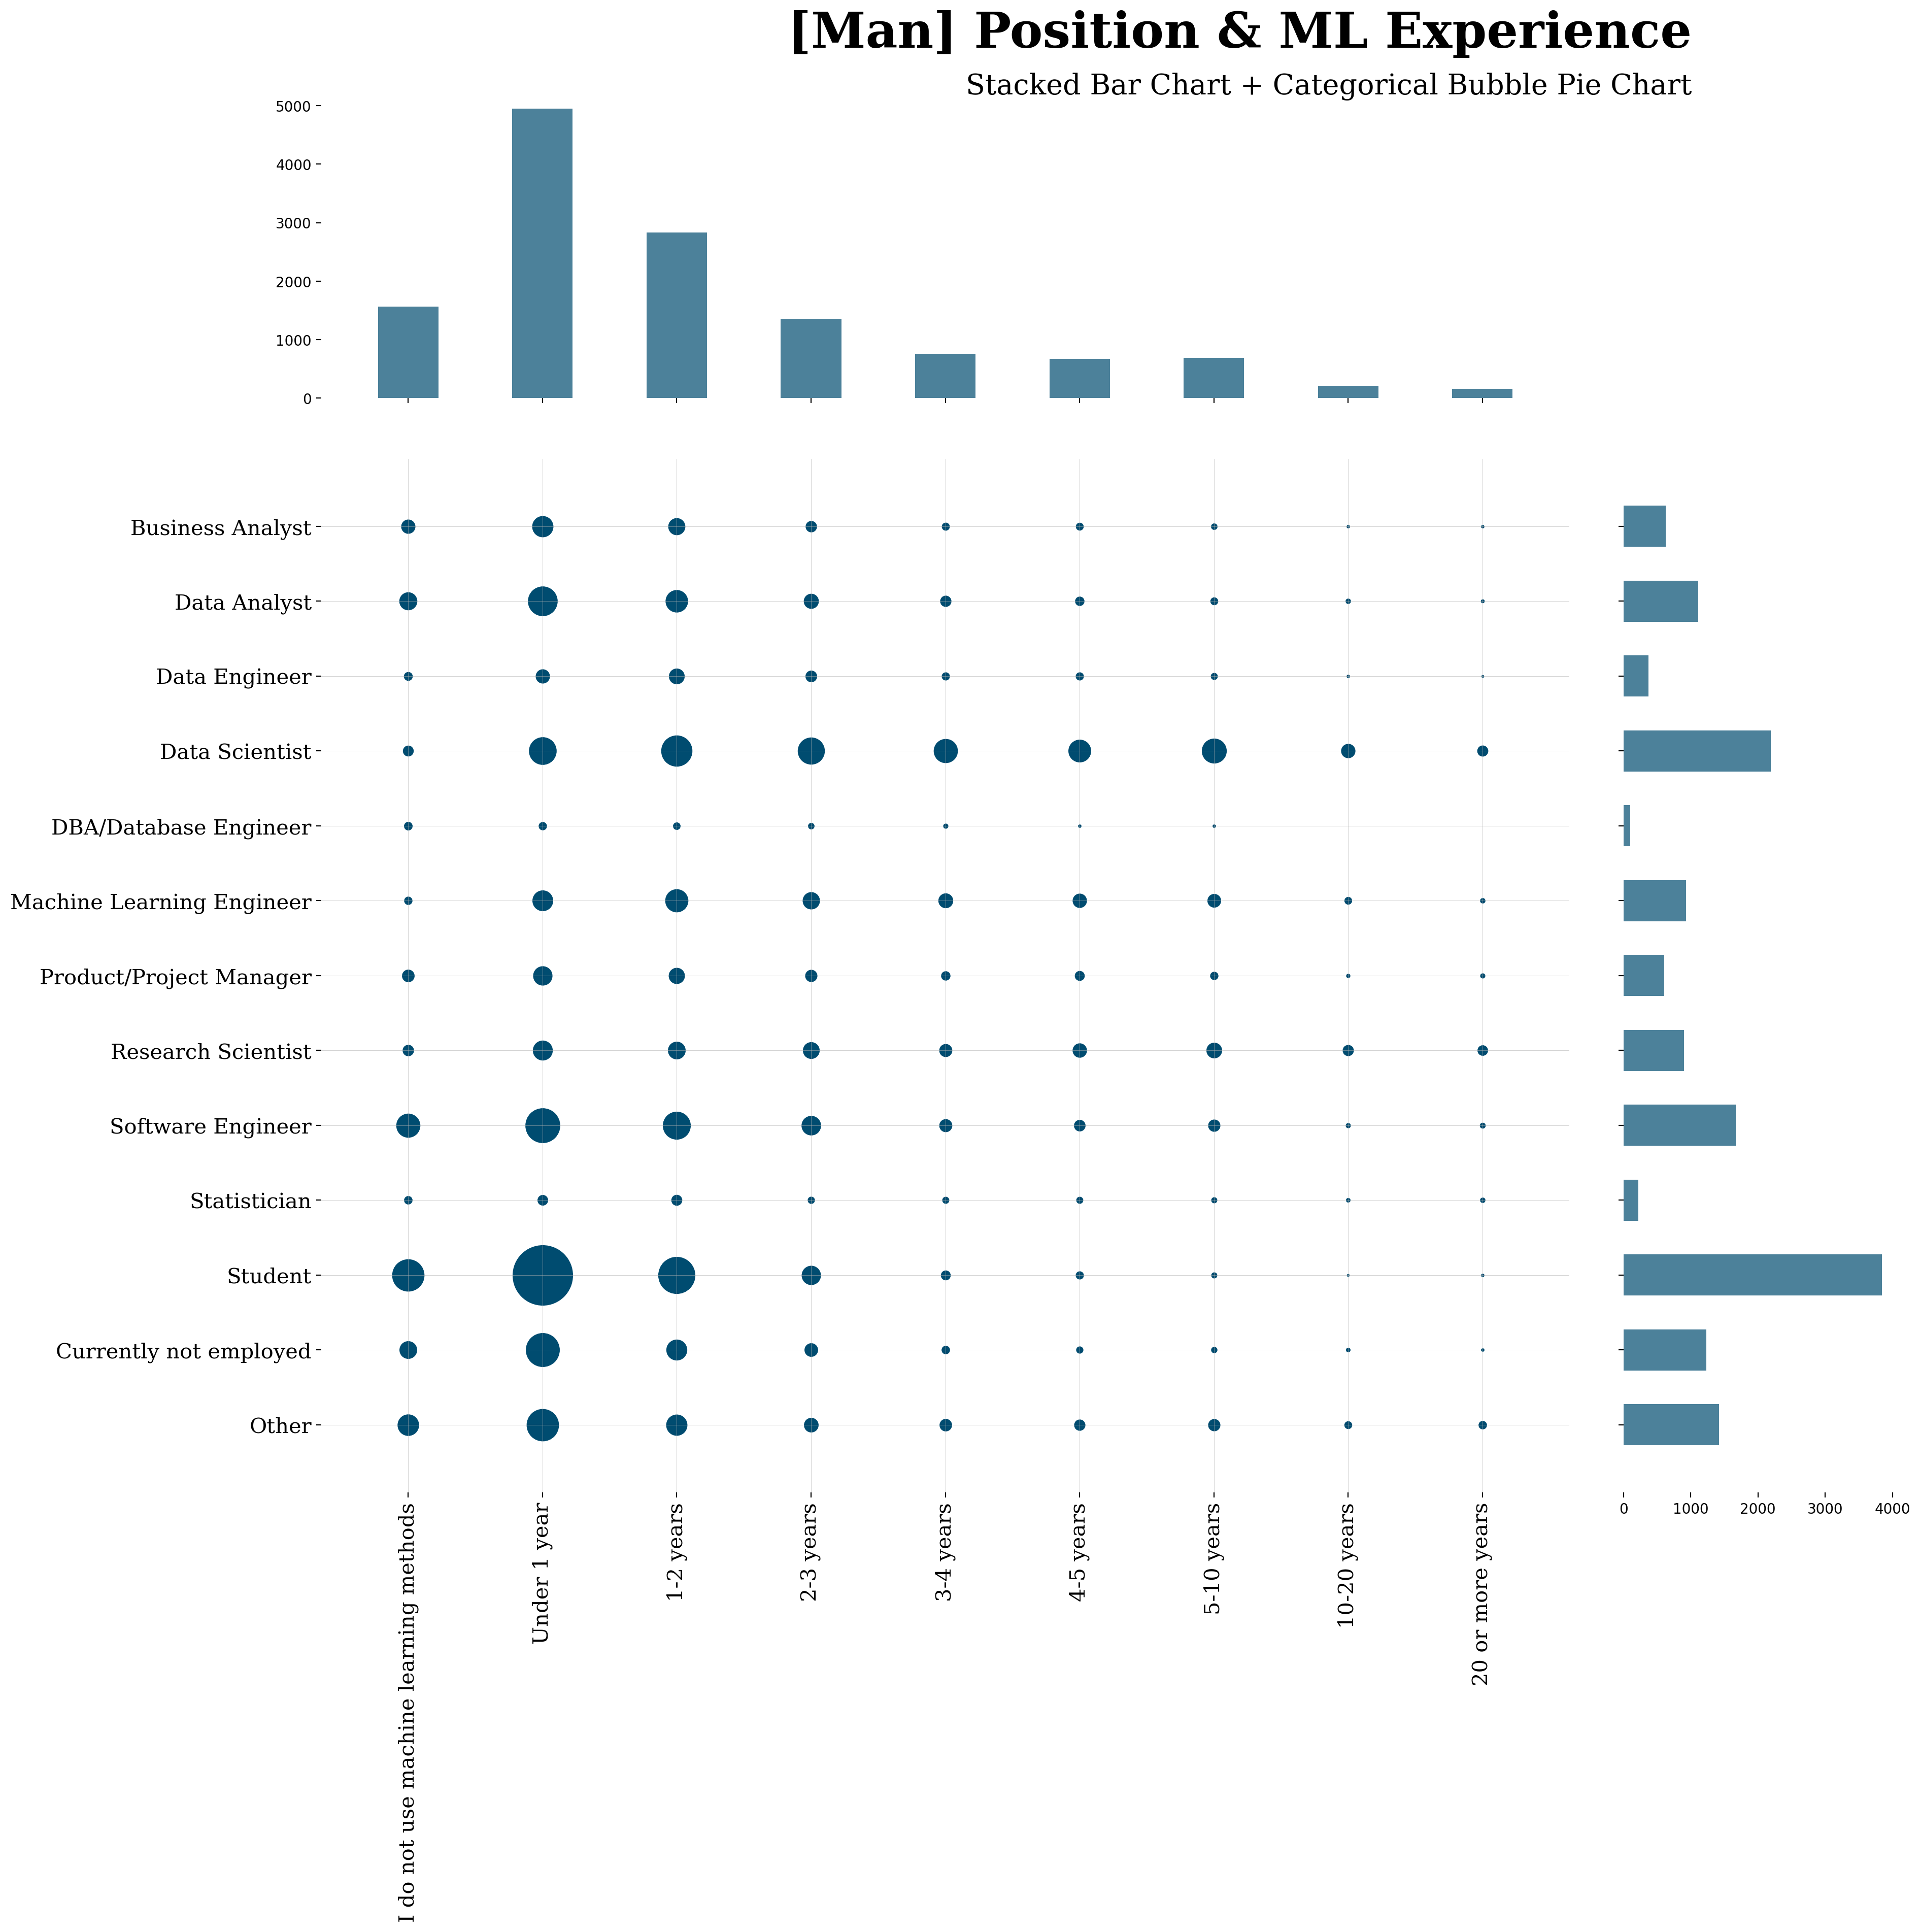

In [15]:
fig = plt.figure(figsize=(20, 23), dpi=200)

gs = fig.add_gridspec(5, 5)



ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for q5_idx in q5_order[::-1]:
    for q15_idx in q15_order:
        man = data_q5q15_man[q5_idx][q15_idx]
#         woman = data_q5q15_woman[q5_idx][q15_idx]
        ax_plot.scatter(q15_idx, q5_idx, s=man, color='#004c70')


ax_plot.grid(linewidth=0.2, zorder=0)        

ax_plot.set_yticklabels(q5_idx, fontfamily='serif', fontsize=15)
ax_plot.set_xticklabels(q15_idx, fontfamily='serif', fontsize=15, rotation=90)

# Pos
ax_pos = fig.add_subplot(gs[0, :4], sharex=ax_plot) 
data_q15_woman = data[data['Q2']=='Man']['Q15'].value_counts()[q15_order]
ax_pos.bar(data_q15_woman.index, data_q15_woman, width=0.45, alpha=0.7, color='#004c70')

plt.setp(ax_pos.get_xticklabels(), visible=False)


# Exp
ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot) 

data_q5_woman = data[data['Q2']=='Man']['Q5'].value_counts()[q5_order]
ax_exp.barh(data_q5_woman.index[::-1], data_q5_woman[::-1], height=0.55, alpha=0.7, color='#004c70')

plt.setp(ax_exp.get_yticklabels(), visible=False)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)
    

fig.text(0.8, 0.9, '[Man] Position & ML Experience', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=20, ha='right')
# plt.tight_layout()
plt.show()

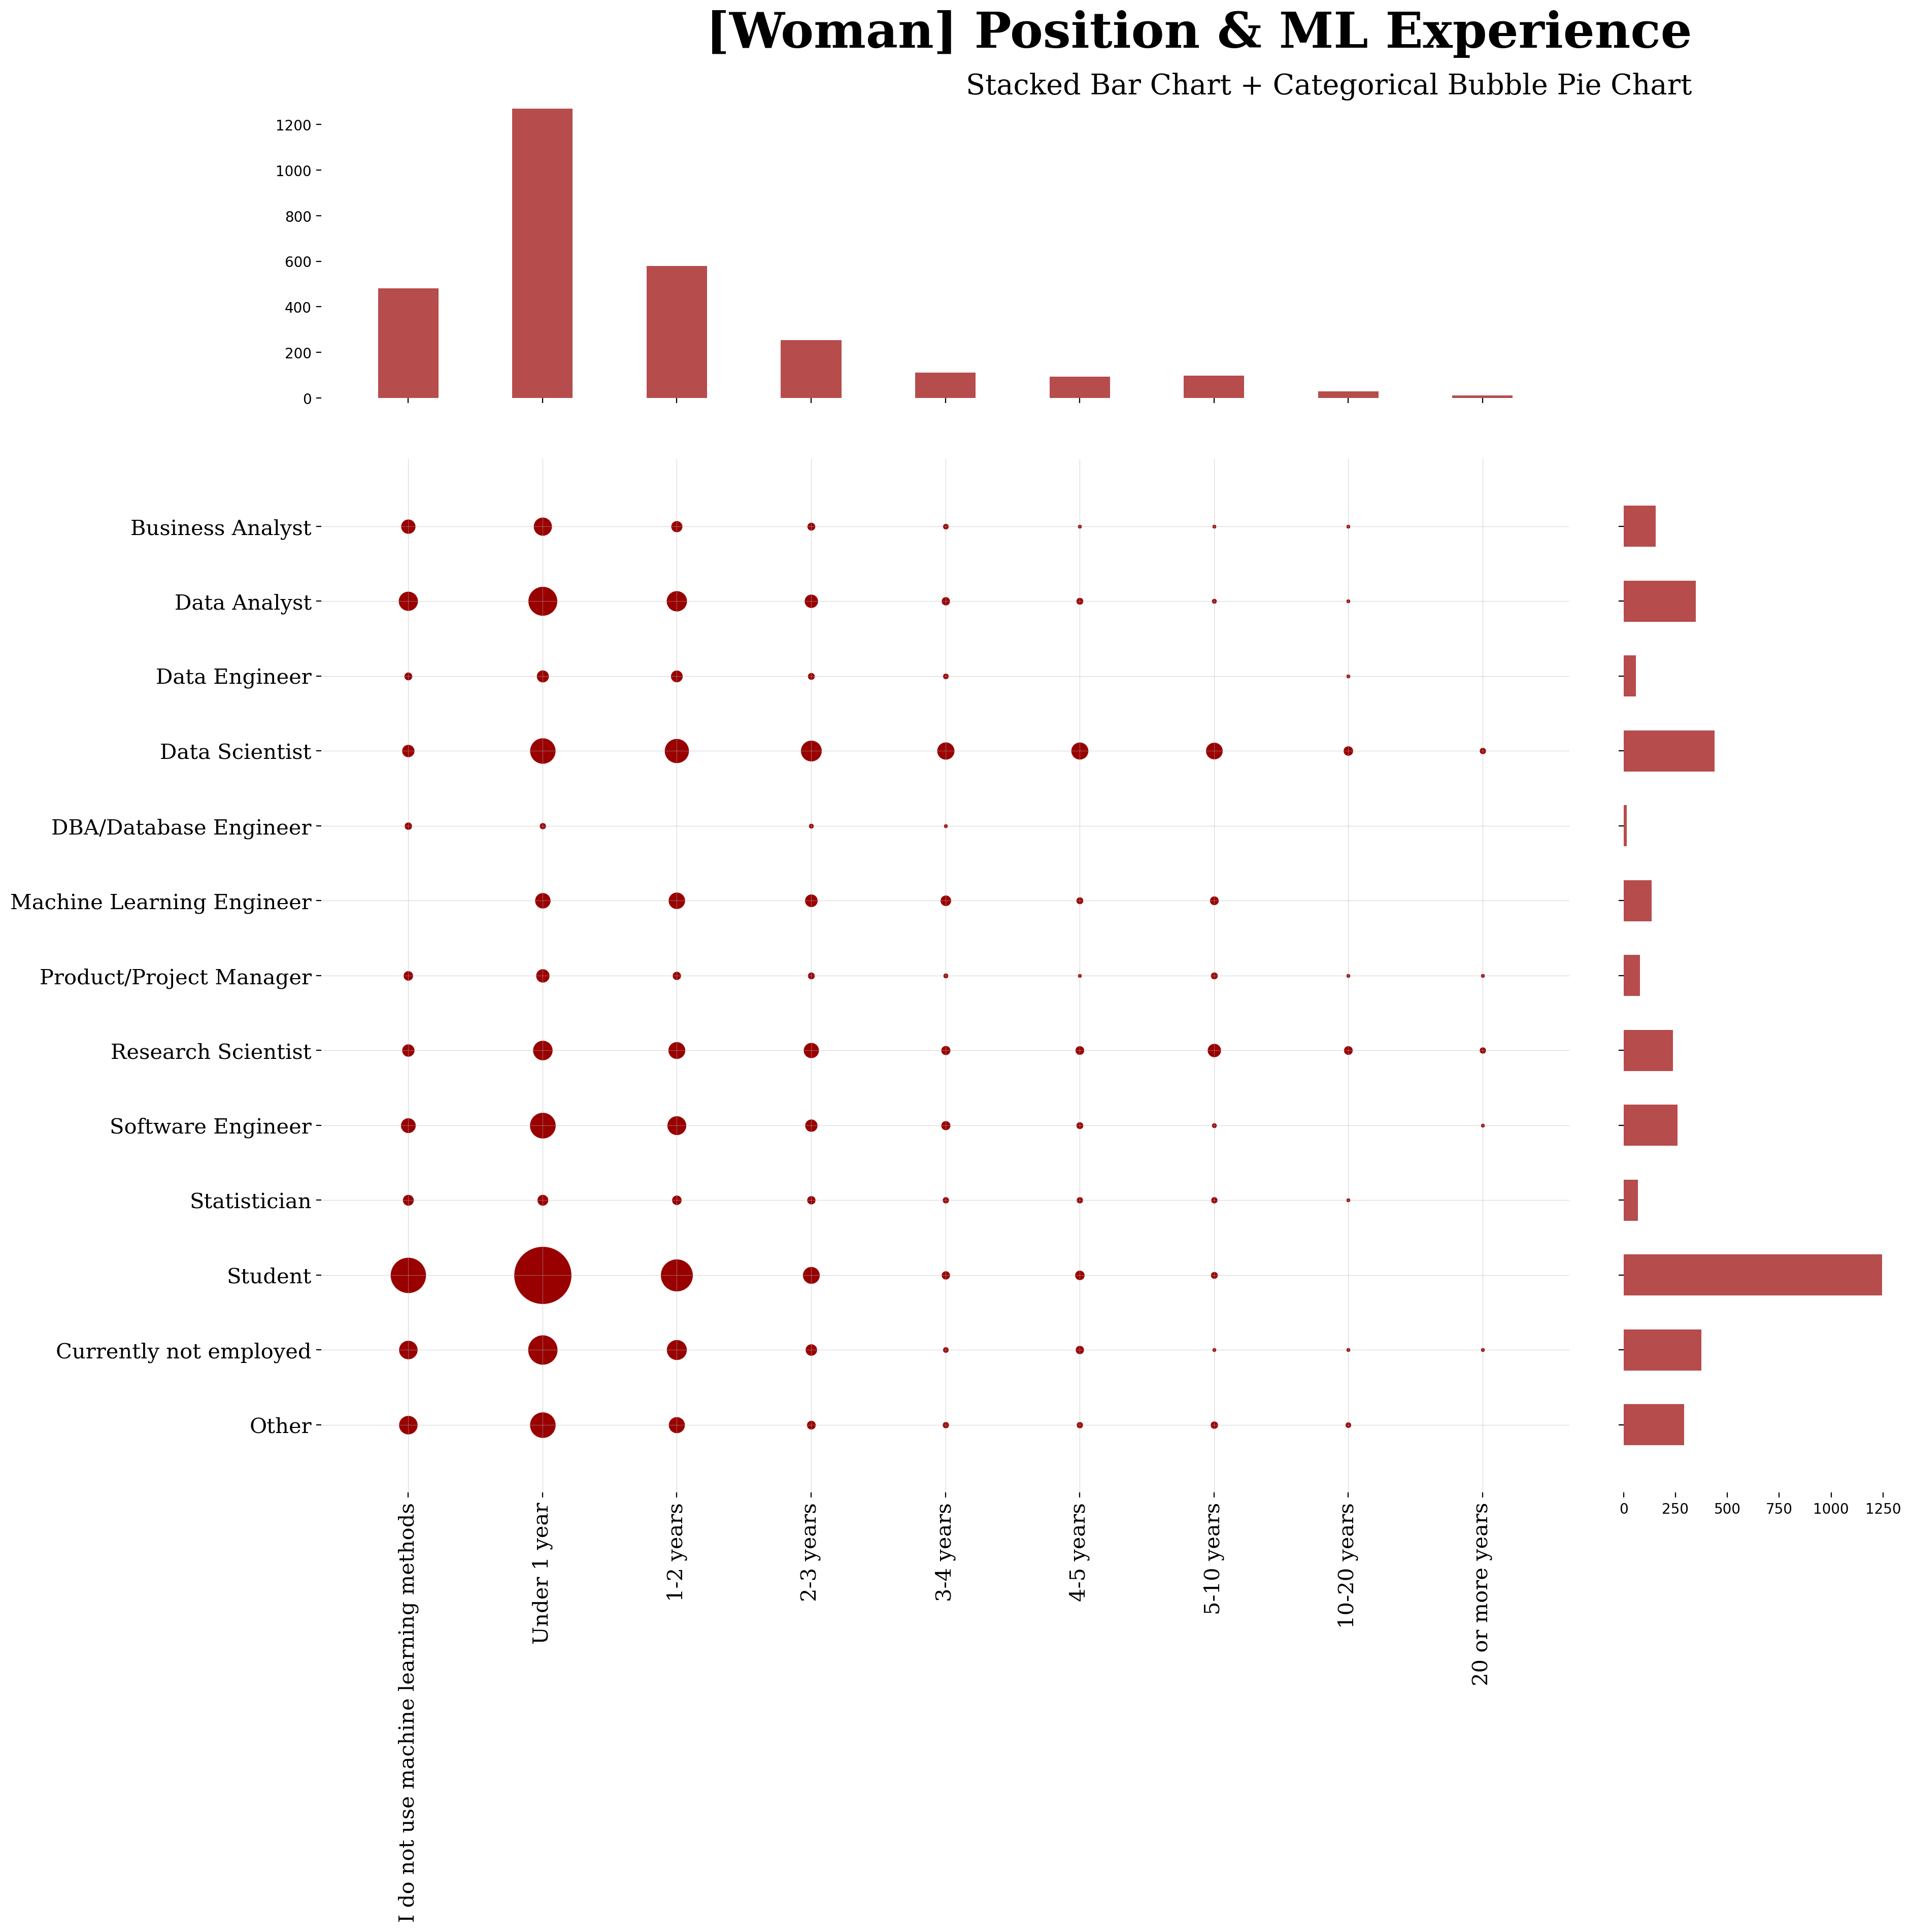

In [16]:

fig = plt.figure(figsize=(20, 23), dpi=200)

gs = fig.add_gridspec(5, 5)



ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for q5_idx in q5_order[::-1]:
    for q15_idx in q15_order:
#         man = data_q5q15_man[q5_idx][q15_idx]
        woman = data_q5q15_woman[q5_idx][q15_idx]
        ax_plot.scatter(q15_idx, q5_idx, s=woman*3, color='#990000')


ax_plot.grid(linewidth=0.2, zorder=0)        

ax_plot.set_yticklabels(q5_idx, fontfamily='serif', fontsize=15)
ax_plot.set_xticklabels(q15_idx, fontfamily='serif', fontsize=15, rotation=90)

# Pos
ax_pos = fig.add_subplot(gs[0, :4], sharex=ax_plot) 
data_q15_woman = data[data['Q2']=='Woman']['Q15'].value_counts()[q15_order]
ax_pos.bar(data_q15_woman.index, data_q15_woman, width=0.45, alpha=0.7, color='#990000')

plt.setp(ax_pos.get_xticklabels(), visible=False)


# Exp
ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot) 

data_q5_woman = data[data['Q2']=='Woman']['Q5'].value_counts()[q5_order]
ax_exp.barh(data_q5_woman.index[::-1], data_q5_woman[::-1], height=0.55, alpha=0.7, color='#990000')

plt.setp(ax_exp.get_yticklabels(), visible=False)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)
    

fig.text(0.8, 0.9, '[Woman] Position & ML Experience', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=20, ha='right')
# plt.tight_layout()
plt.show()

## Q24. Compensation

In [17]:
q24_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
'10,000-14,999','15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999',
'100,000-124,999', '125,000-149,999',  '150,000-199,999', '200,000-249,999',  '250,000-299,999', '300,000-500,000', '> $500,000']

data_q24 = data['Q24'].value_counts()[q24_order]

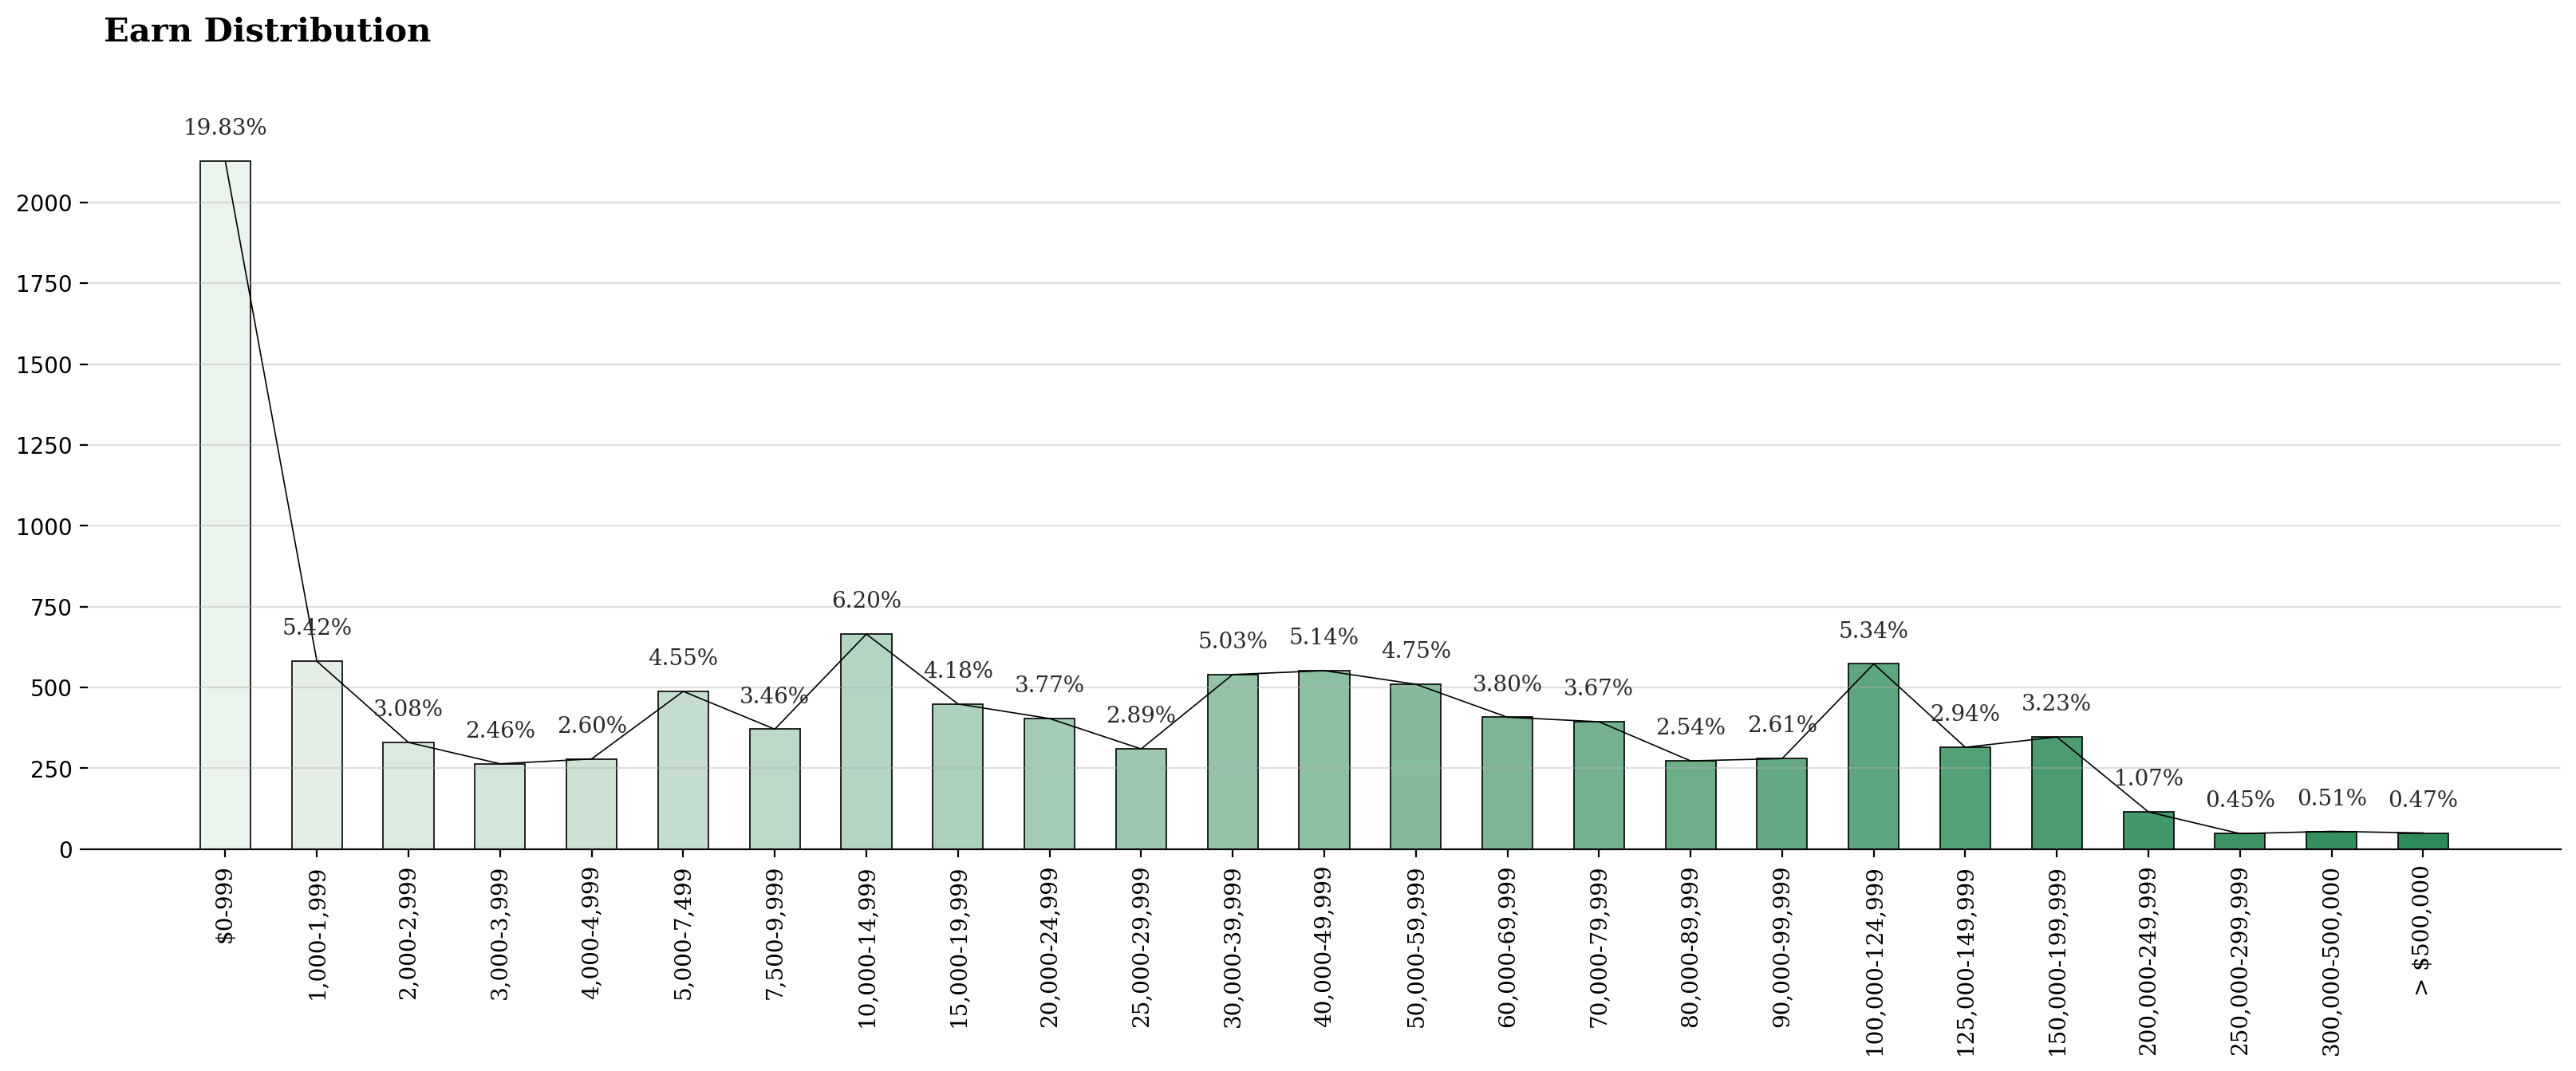

In [18]:
fig, ax = plt.subplots(1,1, figsize=(20, 6), dpi=200)
ax.bar(data_q24.index, data_q24, width=0.55, 
       edgecolor='black', color=sns.light_palette("seagreen", len(data_q24)),
       linewidth=0.6)

ax.plot(data_q24.index, data_q24, c='k', linewidth=0.6)

for i in data_q24.index:
    ax.annotate(f"{data_q24[i]/data_q24.sum()*100:.2f}%", 
                   xy=(i, data_q24[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#2a2a2a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q24.index, fontfamily='serif', rotation=90)

fig.text(0.13, 0.97, 'Earn Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

It's an interesting phenomenon.

Depending on the characteristics of the annual salary, a decreasing graph should be drawn, but it is not.

If you look at the bouncing section (peak) now, there is a bouncing section at 1000, 5000, 10000, 30000, 100000 sections.

I think this is an easy-to-conceive number when people survey.

Later, I will analyze the relationship between salary and other factors.

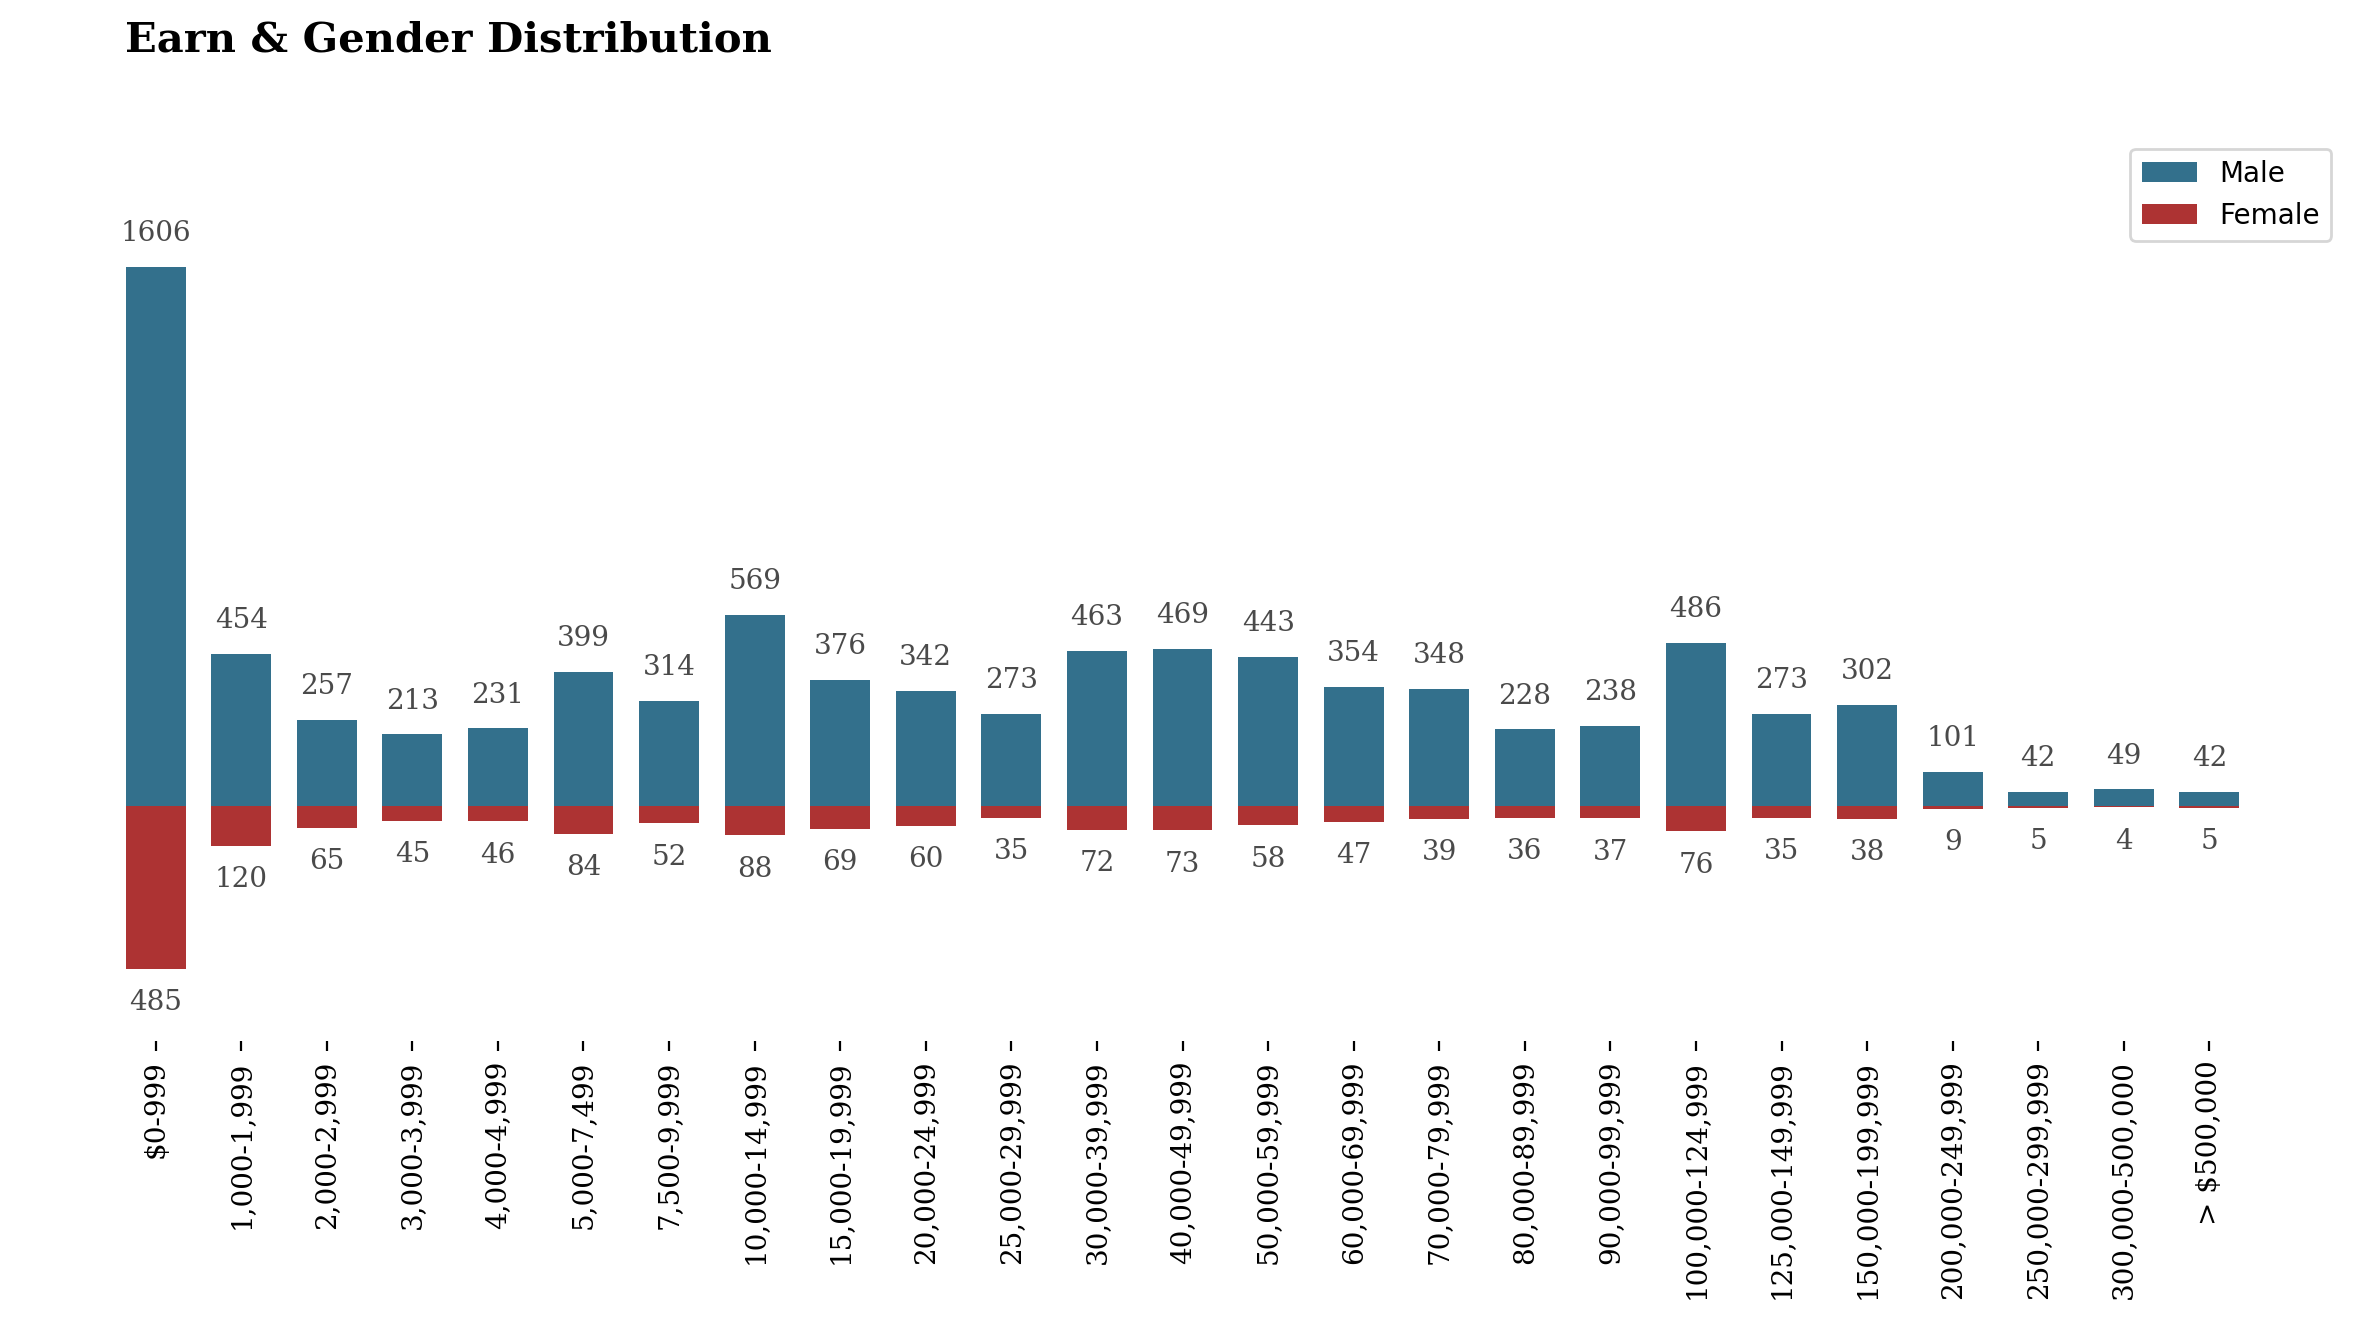

In [19]:
# Q2 Analysis
man = data[data['Q2']=='Man']['Q24'].value_counts()[q24_order]
woman = -data[data['Q2']=='Woman']['Q24'].value_counts()[q24_order]

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.7, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.7, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-700, 2000)

for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax.set_yticks([])   
ax.legend()
fig.text(0.16, 0.95, 'Earn & Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()

In [20]:
data_q5q24 = pd.pivot_table(data, values='count', index=['Q5'], columns=['Q24'], aggfunc=np.sum).fillna(0).astype(int).loc[:,q24_order]

data_q5q24 = (data_q5q24.T /data_q5q24.sum(axis=1)).cumsum()

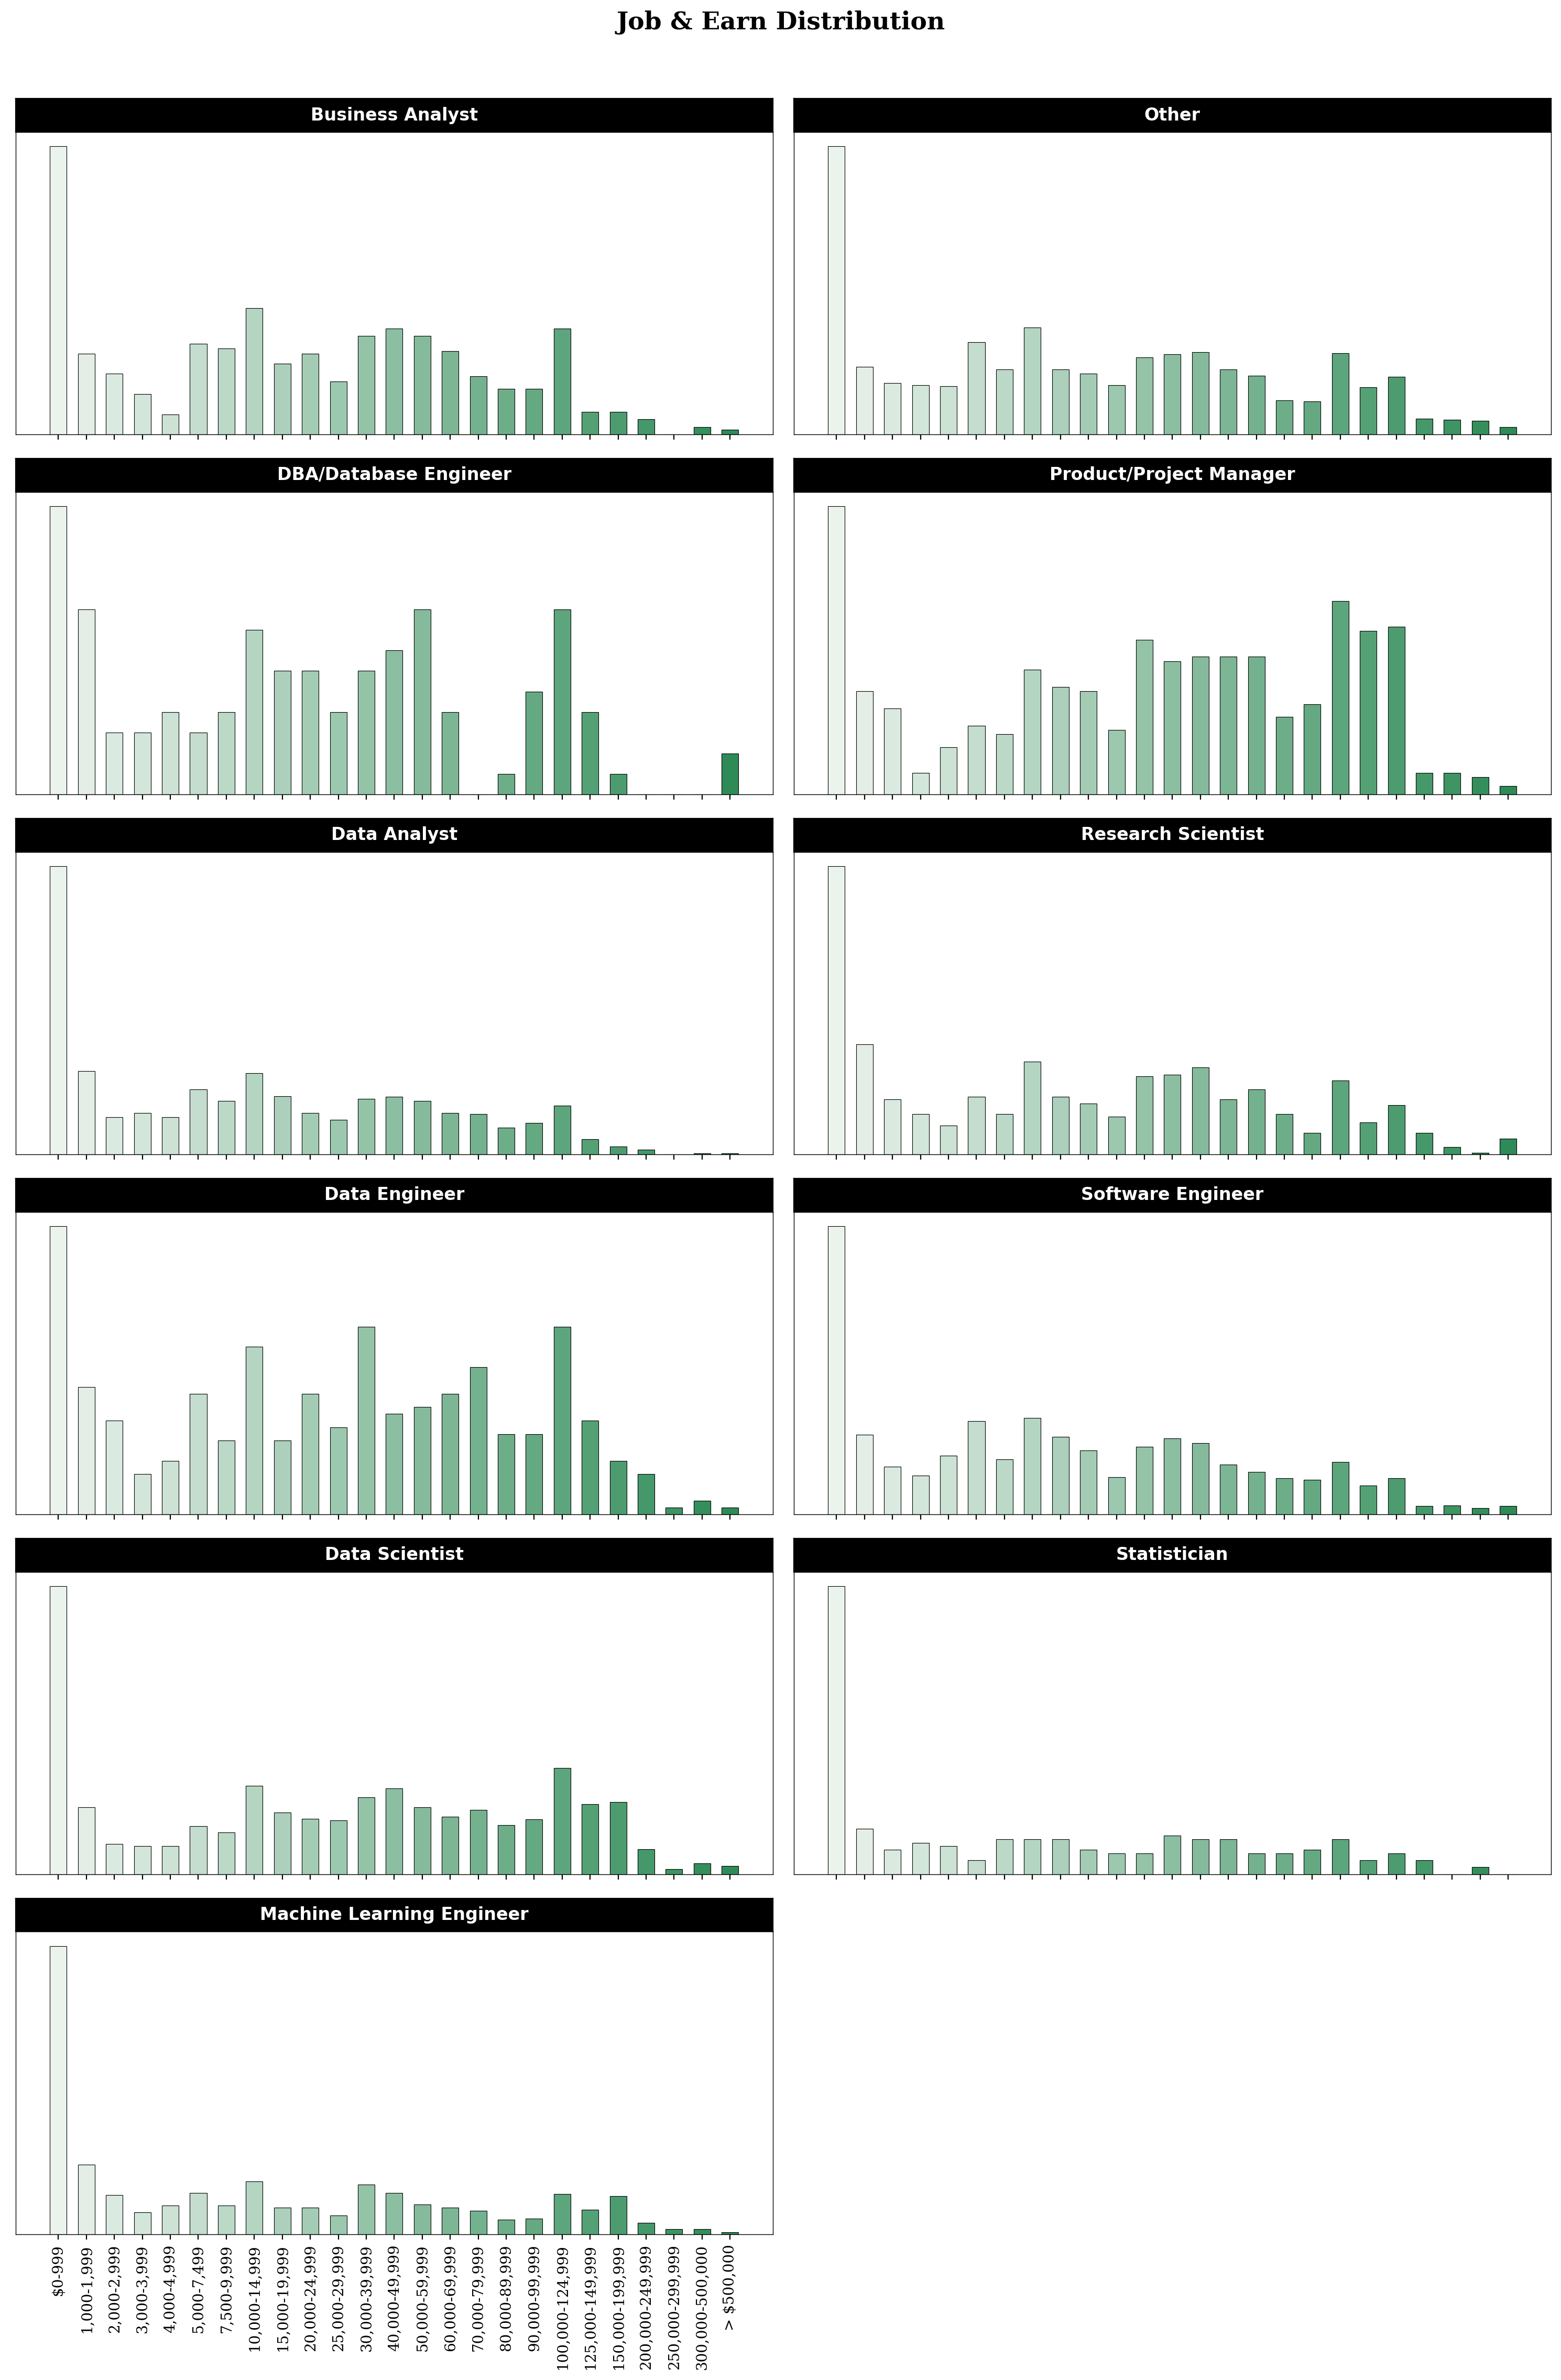

In [21]:
data_q5q24 = pd.pivot_table(data, values='count', index=['Q5'], columns=['Q24'], aggfunc=np.sum).fillna(0).astype(int).loc[:,q24_order]
data_q5q24 = (data_q5q24.T /data_q5q24.sum(axis=1))#.rename(columns={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

colors=sns.light_palette("seagreen", len(data_q24))

fig, ax = plt.subplots(6, 2,figsize=(15, 22), sharex=True)

for idx, q5_idx in enumerate(data_q5q24.columns):


    ax[idx%6][idx//6].bar(data_q5q24[q5_idx].index, data_q5q24[q5_idx], color=colors, edgecolor='black', linewidth=0.4, width=0.6)
    ax[idx%6][idx//6].set_yticks([])
    for s in ['top', 'bottom', 'left', 'right']:
        ax[idx%6][idx//6].spines[s].set_linewidth(0.5)
    
    divider = make_axes_locatable(ax[idx%6][idx//6])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(q5_idx, loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=12, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][1].set_xticklabels(q24_order, fontfamily='serif', rotation=90)

ax[-1][-1].set_visible(False)

fig.suptitle('Job & Earn Distribution', fontsize=17, fontweight='bold', fontfamily='serif', y=1.03)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.25)
plt.show()

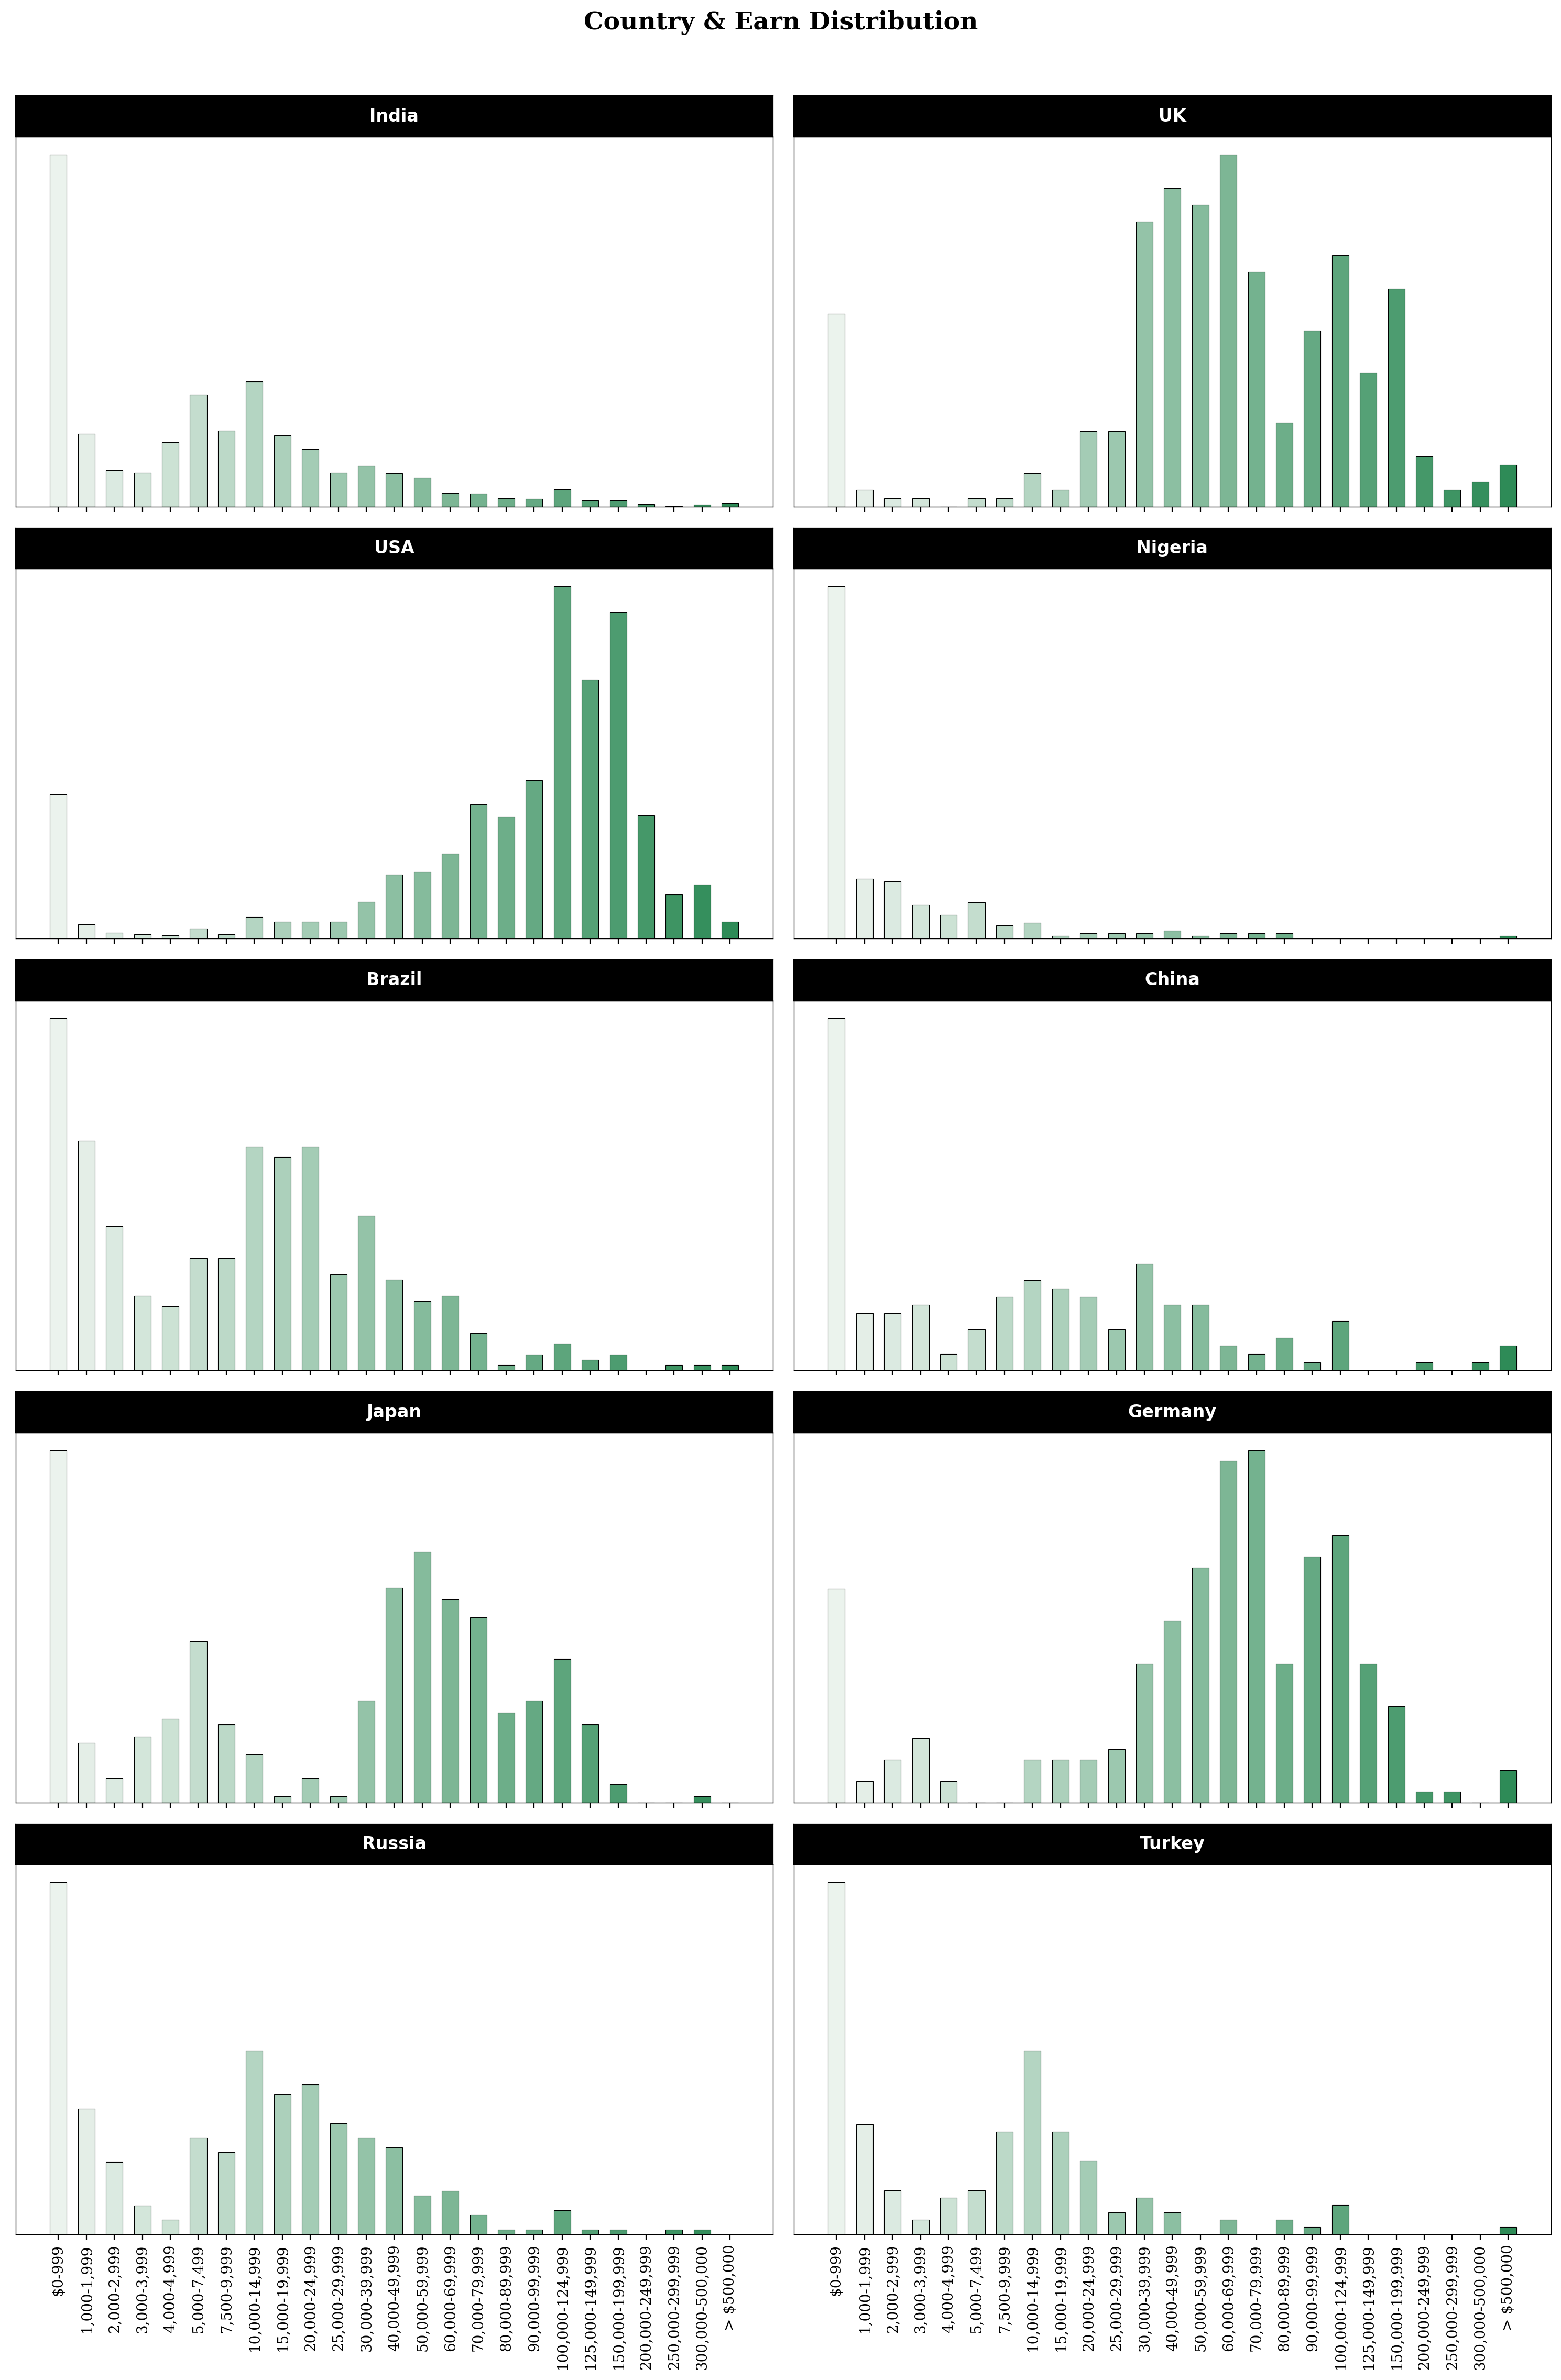

In [22]:
data_q3q24 = pd.pivot_table(data, values='count', index=['Q3'], columns=['Q24'], aggfunc=np.sum).fillna(0).astype(int).loc[q3_order,q24_order]
data_q3q24 = (data_q3q24.T /data_q3q24.sum(axis=1)).rename(columns={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

fig, ax = plt.subplots(5, 2,figsize=(15, 22), sharex=True)

for idx, q3_idx in enumerate(data_q3q24.columns):


    ax[idx%5][idx//5].bar(data_q3q24[q3_idx].index, data_q3q24[q3_idx], color=colors, edgecolor='black', linewidth=0.4, width=0.6)
    ax[idx%5][idx//5].set_yticks([])
    for s in ['top', 'bottom', 'left', 'right']:
        ax[idx%5][idx//5].spines[s].set_linewidth(0.5)
    
    divider = make_axes_locatable(ax[idx%5][idx//5])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(q3_idx, loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=12, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][1].set_xticklabels(q24_order, fontfamily='serif', rotation=90)

fig.suptitle('Country & Earn Distribution', fontsize=17, fontweight='bold', fontfamily='serif', y=1.03)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.25)
plt.show()

- UK, USA, Germany

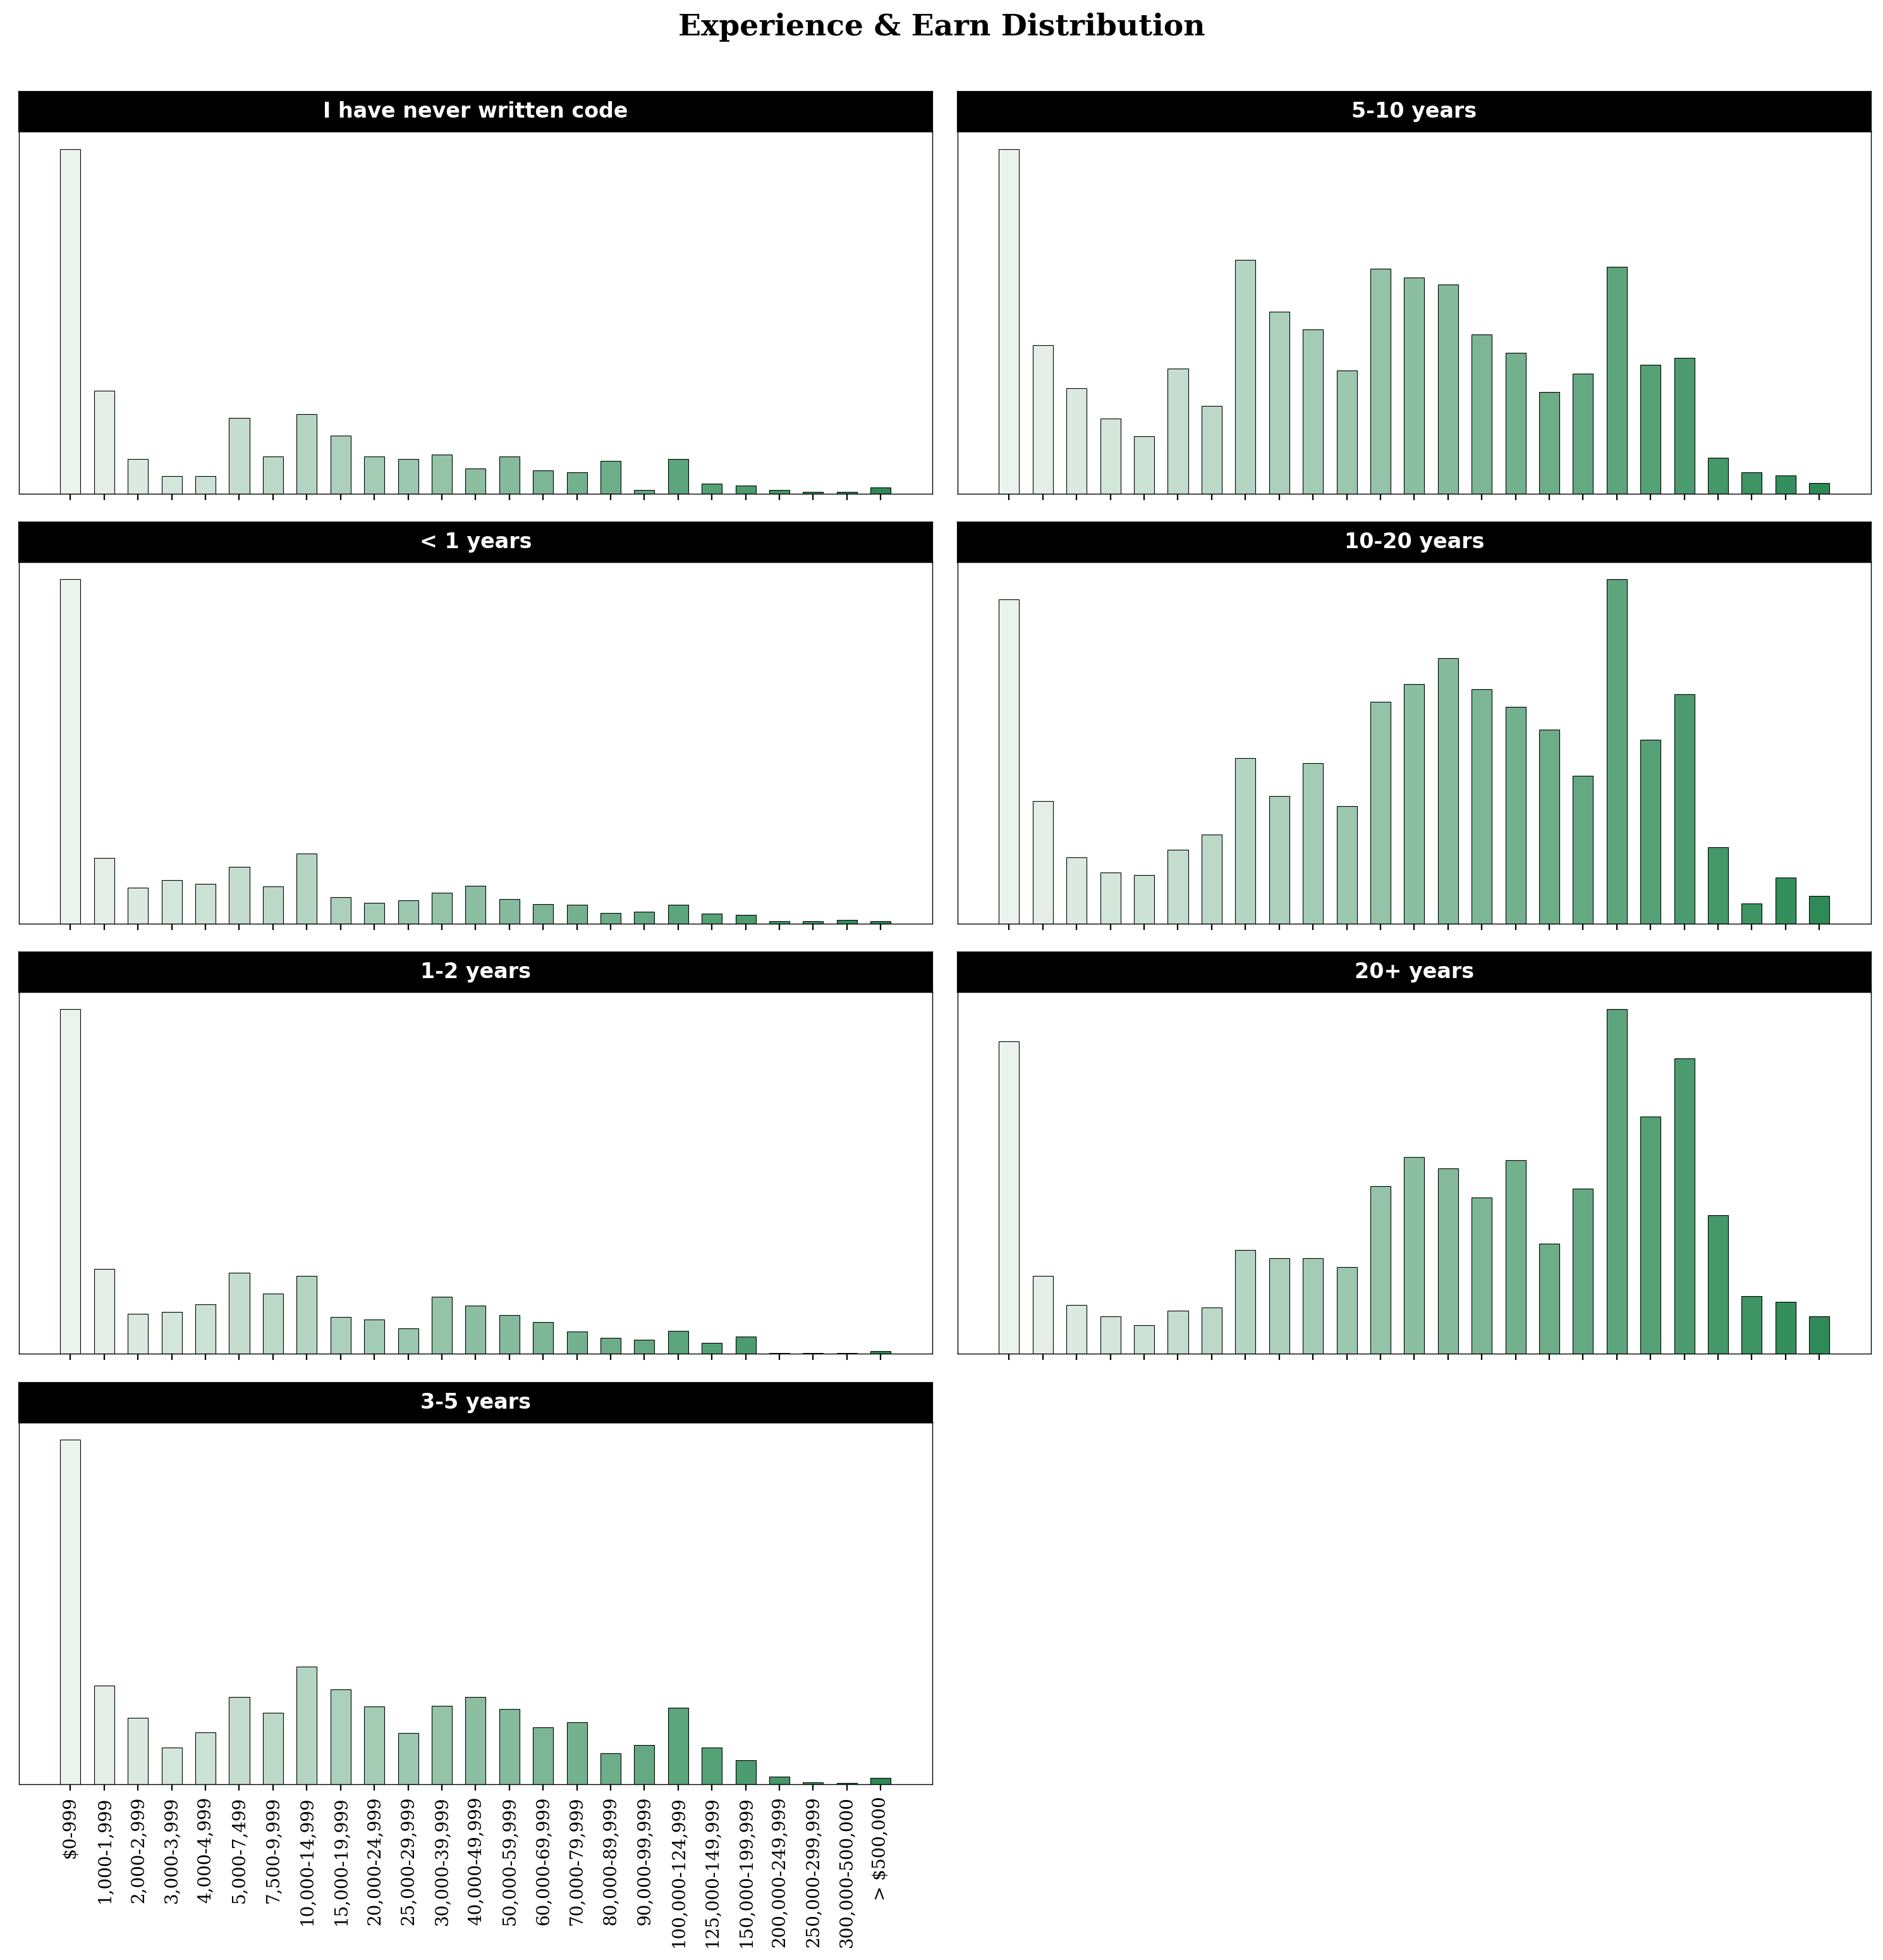

In [23]:
data_q6q24 = pd.pivot_table(data, values='count', index=['Q6'], columns=['Q24'], aggfunc=np.sum).fillna(0).astype(int).loc[q6_order,q24_order]
data_q6q24 = (data_q6q24.T /data_q6q24.sum(axis=1))#.rename(columns={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

fig, ax = plt.subplots(4, 2,figsize=(15, 15), sharex=True)

for idx, q6_idx in enumerate(data_q6q24.columns):


    ax[idx%4][idx//4].bar(data_q6q24[q6_idx].index, data_q6q24[q6_idx], color=colors, edgecolor='black', linewidth=0.4, width=0.6)
    ax[idx%4][idx//4].set_yticks([])
    for s in ['top', 'bottom', 'left', 'right']:
        ax[idx%4][idx//4].spines[s].set_linewidth(0.5)
    
    divider = make_axes_locatable(ax[idx%4][idx//4])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(q6_idx, loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=12, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][1].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][-1].set_visible(False)

fig.suptitle('Experience & Earn Distribution', fontsize=17, fontweight='bold', fontfamily='serif', y=1.03)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.25)
plt.show()

### Please be sure to leave a reference when using code or taking ideas in my visualizations.